# Data Understanding


## 1) Importation des bibiliothèques nécessaires pour la visualisation des données et les comprendre

In [1]:
import pandas as pd 
import numpy as np

In [2]:
header=['Status of existing checking account','Duration in month','Credit history','Purpose'
      ,'Credit amount','Savings account/bonds','Present employment since','Installment rate in percentage of disposable income'
       ,'Personal status and sex','Other debtors / guarantors','Present residence since','Property','Age in years','Other installment plans','Housing','Number of existing credits at this bank'
       ,'Job','Number of people being liable to provide maintenance for','Telephone','foreign worker','Cost Matrix']


## 2) charger le fichier/importation des données "german.data"

In [3]:

data2= pd.read_table("german.data",header=None,sep=" ",names=header)
data2;
data2.head()




C:\Users\BHS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
## Décrire les données 
#la valeur la plus probable = la valeur moyenne
#la valeur  mean, on la compare avec l'écart type et la médiane 
#le moyenne est plus robuste

In [4]:
data2.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Cost Matrix
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [5]:
#Afficher le type de chaque colonne
#Cost Matrix est une variable quantitative 
# on a des variables qualitatives qu'on va les encoder par suite
data2.dtypes

Status of existing checking account                         object
Duration in month                                            int64
Credit history                                              object
Purpose                                                     object
Credit amount                                                int64
Savings account/bonds                                       object
Present employment since                                    object
Installment rate in percentage of disposable income          int64
Personal status and sex                                     object
Other debtors / guarantors                                  object
Present residence since                                      int64
Property                                                    object
Age in years                                                 int64
Other installment plans                                     object
Housing                                                     ob

In [6]:
# Vérifier l'existence des valeurs nulles
data2.isna().sum()

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [7]:
# vérifier la forme ("shape")
# Connaitre la dimension de nos données

data2.shape


(1000, 21)

In [8]:
# Etude permettant de détecter les pints abbérants (Anomalies)
# Boxplot : C'est une boîte à moustache
#trait vert = mediane
#distance interquartile = (Q3 - Q1)*1,5 = étendue (methode Tukey's-Extreme Velue Theory) 
#si les points sortent de cette distance = donc ce sont des points abérrants (la suppresion de ces points dépend de la situation)
# car la valeur moyenne est différente de la valeur médiane
data2.boxplot();

In [9]:
#Visualiser les noms des colonnes

for colonne in data2.columns:
    print (colonne)

Status of existing checking account
Duration in month
Credit history
Purpose
Credit amount
Savings account/bonds
Present employment since
Installment rate in percentage of disposable income
Personal status and sex
Other debtors / guarantors
Present residence since
Property
Age in years
Other installment plans
Housing
Number of existing credits at this bank
Job
Number of people being liable to provide maintenance for
Telephone
foreign worker
Cost Matrix


In [ ]:
#Dessinez une matrice de diagrammes de dispersion

pd.plotting.scatter_matrix(data2, figsize=(10,10));

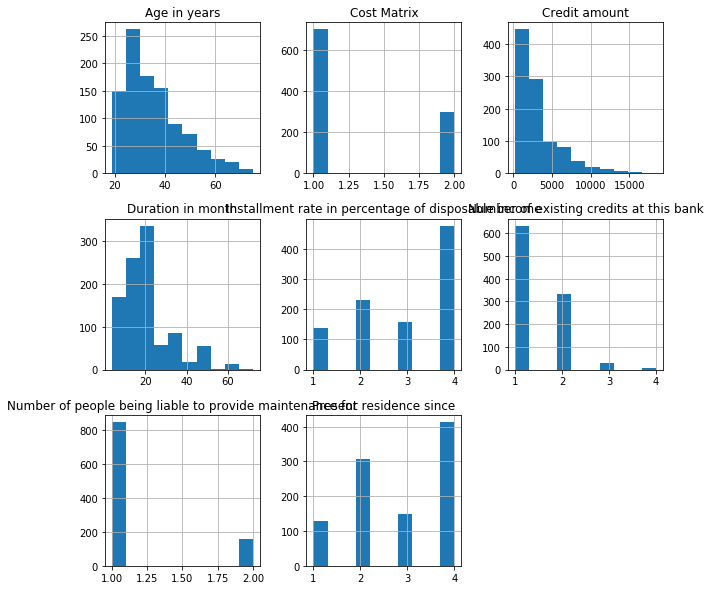

In [10]:
data2.hist(figsize=(10,10));

# Feature Engineering

In [11]:
#One Hot encoder

from sklearn.preprocessing import OneHotEncoder
onehotencoder= OneHotEncoder()

# Encoding categorical data
### . Encoding the Independent Variable

## Encoder la 1ere variable indépendante: 'Status of existing checking account'

In [12]:
#   *************************   Status of existing checking account  ************************
# on a utilisé la méthode: fit_transform pour Ajuster aux données, puis les transformer.
# Reshape used to give a new shape to an array without changing its data.  => matrice vecteur

matrice1 =onehotencoder.fit_transform(data2["Status of existing checking account"].values.reshape(-1,1)).toarray()

In [13]:
#transformer notre colonne et les segmenter selon les valeurs qu'elle peut prendre 
# l'affecter en une data frame
mat1=pd.DataFrame(matrice1,
                  columns=["... <    0 DM","... <  200 DM","... >= 200 DM /salary ","no checking account"],
                  index=data2.index)

#Affichage
mat1.head(10)

,... < 0 DM,... < 200 DM,... >= 200 DM /salary,no checking account
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,1.0
9,0.0,1.0,0.0,0.0


In [14]:
#On vas supprimer la 1 ere colonne " ... <    0 DM " 
mat1.drop(columns=["... <    0 DM"],inplace=True)
mat1.head()

,... < 200 DM,... >= 200 DM /salary,no checking account
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [15]:
#Suppression de la colonne : Status of existing checking account
data2.drop(columns=["Status of existing checking account"],inplace=True)


In [16]:
# Affichage des 5premières lignes
data2.head()

,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix
0,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [17]:
#CoNCATENATION avec la matrice initiale
data2_fin1 = pd.concat( [mat1,data2] , axis=1 )
data2_fin1;

## Encoder la variable indépendante:  'Credit history '

In [18]:
#   *************************   Credit history  ************************


matrice2 =onehotencoder.fit_transform(data2["Credit history"].values.reshape(-1,1)).toarray()
mat2=pd.DataFrame(matrice2,
                  columns=["no credits taken/all credits paid back duly",
                           "all credits at this bank paid back duly",
                           "existing credits paid back duly till now ",
                           "delay in paying off in the past",
                          "critical account/other credits existing (not at this bank)"],
                  index=data2.index)


mat2.head(10)

,no credits taken/all credits paid back duly,all credits at this bank paid back duly,existing credits paid back duly till now,delay in paying off in the past,critical account/other credits existing (not at this bank)
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0


In [19]:
#Suppression de la colonne : Status of existing checking account
mat2.drop(columns=["no credits taken/all credits paid back duly"],inplace=True)
mat2.head()

,all credits at this bank paid back duly,existing credits paid back duly till now,delay in paying off in the past,critical account/other credits existing (not at this bank)
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [20]:
#Suppression de la colonne : Credit history
data2.drop(columns=["Credit history"],inplace=True)


In [21]:
#CoNCATENATION 
data2_fin2 = pd.concat( [mat1,mat2,data2] , axis=1 )
data2_fin2

,... < 200 DM,... >= 200 DM /salary,no checking account,all credits at this bank paid back duly,existing credits paid back duly till now,delay in paying off in the past,critical account/other credits existing (not at this bank),Duration in month,Purpose,Credit amount,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,A43,1169,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,48,A43,5951,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12,A46,2096,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42,A42,7882,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24,A40,4870,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,36,A46,9055,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,24,A42,2835,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,36,A41,6948,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,12,A43,3059,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,30,A40,5234,...,A123,28,A143,A152,2,A174,1,A191,A201,2


## Encoder la variable indépendante:  'Telephone'

In [22]:

#   *************************   Telephone  ************************


matrice4 =onehotencoder.fit_transform(data2["Telephone"].values.reshape(-1,1)).toarray()
mat4=pd.DataFrame(matrice4,
                  columns=["none",
                           "yes, registered under the customers name",
                        ],
                  index=data2.index)


mat4.head(10)

,none,"yes, registered under the customers name"
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,0.0,1.0
6,1.0,0.0
7,0.0,1.0
8,1.0,0.0
9,1.0,0.0


In [23]:
#Suppression de la colonne :NONE
mat4.drop(columns=["none"],inplace=True)
mat4.head(10)

,"yes, registered under the customers name"
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0
6,0.0
7,1.0
8,0.0
9,0.0


In [24]:
#Suppression de la colonne : Credit history
data2.drop(columns=["Telephone"],inplace=True)

In [25]:
#CoNCATENATION 
data2_fin2 = pd.concat( [mat1,mat2,mat4,data2] , axis=1 )
data2_fin2;

In [26]:
data2_fin2.shape

(1000, 26)

## Encoder la variable indépendante: 'foreign worker'

In [27]:

#   *************************   foreign worker  ************************


matrice5 =onehotencoder.fit_transform(data2["foreign worker"].values.reshape(-1,1)).toarray()
mat5=pd.DataFrame(matrice5,
                  columns=["yes",
                           "no",
                        ],
                  index=data2.index)
#Suppression de la colonne : Credit history
data2.drop(columns=["foreign worker"],inplace=True)

mat5.head(20)


,yes,no
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [28]:
#Suppression de la colonne :NO
mat5.drop(columns=["no"],inplace=True)
mat5.head(10)

,yes
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [29]:
#CoNCATENATION 
data2_fin2 = pd.concat( [mat1,mat2,mat4,mat5,data2] , axis=1 )
data2_fin2

,... < 200 DM,... >= 200 DM /salary,no checking account,all credits at this bank paid back duly,existing credits paid back duly till now,delay in paying off in the past,critical account/other credits existing (not at this bank),"yes, registered under the customers name",yes,Duration in month,...,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Cost Matrix
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,6,...,A101,4,A121,67,A143,A152,2,A173,1,1
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,48,...,A101,2,A121,22,A143,A152,1,A173,1,2
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,12,...,A101,3,A121,49,A143,A152,1,A172,2,1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,42,...,A103,4,A122,45,A143,A153,1,A173,2,1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,24,...,A101,4,A124,53,A143,A153,2,A173,2,2
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,36,...,A101,4,A124,35,A143,A153,1,A172,2,1
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,24,...,A101,4,A122,53,A143,A152,1,A173,1,1
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,36,...,A101,2,A123,35,A143,A151,1,A174,1,1
8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12,...,A101,4,A121,61,A143,A152,1,A172,1,1
9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,30,...,A101,2,A123,28,A143,A152,2,A174,1,2


In [30]:
data2_fin2.shape

(1000, 26)

## Encoder la variable indépendante: 'Other installment plans'

In [31]:
#*************************** Other installment plans *************************
data2["Other installment plans"].unique()

array(['A143', 'A141', 'A142'], dtype=object)

In [32]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [33]:
matrice6 = onehotencoder.fit_transform(data2["Other installment plans"].values.reshape(-1,1))

In [34]:
data2["Other installment plans"].values.reshape(-1,1).shape

(1000, 1)

In [35]:
matrice6.toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [36]:
data2["Other installment plans"][0:30]

0     A143
1     A143
2     A143
3     A143
4     A143
5     A143
6     A143
7     A143
8     A143
9     A143
10    A143
11    A143
12    A143
13    A143
14    A143
15    A143
16    A143
17    A141
18    A143
19    A143
20    A143
21    A143
22    A143
23    A143
24    A143
25    A141
26    A143
27    A143
28    A143
29    A143
Name: Other installment plans, dtype: object

In [37]:
pd.concat ([pd.DataFrame(matrice6.toarray(),index=data2.index),
            data2["Other installment plans"]
           ],
           axis=1)

,0,1,2,Other installment plans
0,0.0,0.0,1.0,A143
1,0.0,0.0,1.0,A143
2,0.0,0.0,1.0,A143
3,0.0,0.0,1.0,A143
4,0.0,0.0,1.0,A143
5,0.0,0.0,1.0,A143
6,0.0,0.0,1.0,A143
7,0.0,0.0,1.0,A143
8,0.0,0.0,1.0,A143
9,0.0,0.0,1.0,A143


In [38]:
matrice6 = matrice6.toarray()

In [39]:
df6 = pd.DataFrame(matrice6,columns=["Bank","Stores","None"],
                  index=data2.index)

In [40]:
df6

,Bank,Stores,None
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,0.0,1.0


In [41]:
df6.drop(columns=["Stores"],inplace=True)

In [42]:
df6

,Bank,None
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


In [43]:
data2.drop(columns=["Other installment plans"],inplace=True)

## Encoder la variable indépendante: 'Personal status and sex'

In [44]:
#*************************** Personal status and sex ***********************
data2["Personal status and sex"].unique()

array(['A93', 'A92', 'A91', 'A94'], dtype=object)

In [45]:
matrice7 = onehotencoder.fit_transform(data2["Personal status and sex"].values.reshape(-1,1))

In [46]:
data2["Personal status and sex"].values.reshape(-1,1).shape

(1000, 1)

In [47]:
matrice7.toarray()

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [48]:
data2["Personal status and sex"][0:30]
pd.concat ([pd.DataFrame(matrice7.toarray(),index=data2.index),
            data2["Personal status and sex"]
           ],
           axis=1)

,0,1,2,3,Personal status and sex
0,0.0,0.0,1.0,0.0,A93
1,0.0,1.0,0.0,0.0,A92
2,0.0,0.0,1.0,0.0,A93
3,0.0,0.0,1.0,0.0,A93
4,0.0,0.0,1.0,0.0,A93
5,0.0,0.0,1.0,0.0,A93
6,0.0,0.0,1.0,0.0,A93
7,0.0,0.0,1.0,0.0,A93
8,1.0,0.0,0.0,0.0,A91
9,0.0,0.0,0.0,1.0,A94


In [49]:
matrice7 = matrice7.toarray()

In [50]:
df7 = pd.DataFrame(matrice7,columns=["male: divorced/separated","female: divorced/separated/married",": male: single","male: married/widowed"],
                  index=data2.index)

In [51]:
data2.drop(columns=["Personal status and sex"],inplace=True)

## Encoder la variable indépendante: 'Job'

In [52]:
data2["Job"].unique()

array(['A173', 'A172', 'A174', 'A171'], dtype=object)

In [53]:
matrice8 = onehotencoder.fit_transform(data2["Job"].values.reshape(-1,1))

In [54]:
data2["Job"].values.reshape(-1,1).shape

(1000, 1)

In [55]:
matrice8.toarray()

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [56]:
data2["Job"][0:30]

0     A173
1     A173
2     A172
3     A173
4     A173
5     A172
6     A173
7     A174
8     A172
9     A174
10    A173
11    A173
12    A173
13    A172
14    A173
15    A172
16    A173
17    A173
18    A174
19    A173
20    A173
21    A173
22    A172
23    A173
24    A173
25    A172
26    A172
27    A173
28    A173
29    A173
Name: Job, dtype: object

In [57]:
pd.concat ([pd.DataFrame(matrice8.toarray(),index=data2.index),
            data2["Job"]
           ],
           axis=1)

,0,1,2,3,Job
0,0.0,0.0,1.0,0.0,A173
1,0.0,0.0,1.0,0.0,A173
2,0.0,1.0,0.0,0.0,A172
3,0.0,0.0,1.0,0.0,A173
4,0.0,0.0,1.0,0.0,A173
5,0.0,1.0,0.0,0.0,A172
6,0.0,0.0,1.0,0.0,A173
7,0.0,0.0,0.0,1.0,A174
8,0.0,1.0,0.0,0.0,A172
9,0.0,0.0,0.0,1.0,A174


In [58]:
matrice8 = matrice8.toarray()

In [59]:
df8 = pd.DataFrame(matrice8,columns=["unemployed/ unskilled  - non-resident","unskilled - resident","skilled employee / official","management/ self-employed/highly qualified employee/ officer"],
                  index=data2.index)

In [60]:
df8.drop(columns=["unemployed/ unskilled  - non-resident"],inplace=True)

In [61]:
data2.drop(columns=["Job"],inplace=True)

## Encoder la variable indépendante: 'Purpose'

In [62]:
#******************** purpose ******************
data2["Purpose"].unique()

array(['A43', 'A46', 'A42', 'A40', 'A41', 'A49', 'A44', 'A45', 'A410',
       'A48'], dtype=object)

In [63]:
matrice9 = onehotencoder.fit_transform(data2["Purpose"].values.reshape(-1,1))

In [64]:
data2["Purpose"].values.reshape(-1,1).shape

(1000, 1)

In [65]:
matrice9.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [66]:
data2["Purpose"][0:30]

0     A43
1     A43
2     A46
3     A42
4     A40
5     A46
6     A42
7     A41
8     A43
9     A40
10    A40
11    A49
12    A43
13    A40
14    A40
15    A43
16    A43
17    A49
18    A41
19    A43
20    A40
21    A43
22    A40
23    A41
24    A42
25    A42
26    A43
27    A43
28    A43
29    A49
Name: Purpose, dtype: object

In [67]:
pd.concat ([pd.DataFrame(matrice9.toarray(),index=data2.index),
            data2["Purpose"]
           ],
           axis=1)

,0,1,2,3,4,5,6,7,8,9,Purpose
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,A43
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,A43
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,A46
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,A42
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A40
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,A46
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,A42
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A41
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,A43
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A40


In [68]:
matrice9= matrice9.toarray()

In [69]:
 df9 = pd.DataFrame(matrice9,columns=["radio/television","education","furniture/equipment","car/new","car/used","business","domestic appliances","repairs","others","retraining"],
                  index=data2.index)

In [70]:
data2.drop(columns=["Purpose"],inplace=True)

In [71]:
#CoNCATENATION 
data2_fin2 = pd.concat( [mat1,mat2,mat4,mat5,df6,df7,df8,df9,data2] , axis=1 )
data2_fin2;

In [72]:
data2_fin2.columns

Index(['... <  200 DM', '... >= 200 DM /salary ', 'no checking account',
       'all credits at this bank paid back duly',
       'existing credits paid back duly till now ',
       'delay in paying off in the past',
       'critical account/other credits existing (not at this bank)',
       'yes, registered under the customers name', 'yes', 'Bank', 'None',
       'male: divorced/separated', 'female: divorced/separated/married',
       ': male: single', 'male: married/widowed', 'unskilled - resident',
       'skilled employee / official',
       'management/ self-employed/highly qualified employee/ officer',
       'radio/television', 'education', 'furniture/equipment', 'car/new',
       'car/used', 'business', 'domestic appliances', 'repairs', 'others',
       'retraining', 'Duration in month', 'Credit amount',
       'Savings account/bonds', 'Present employment since',
       'Installment rate in percentage of disposable income',
       'Other debtors / guarantors', 'Present residenc

### Encoding La Variable Qualitative 'Housing'


In [73]:
data2['Housing'].unique()

array(['A152', 'A153', 'A151'], dtype=object)

In [74]:
data2['Housing'].nunique()

3

In [75]:
from sklearn.preprocessing import OneHotEncoder
onehotencoderHousing = OneHotEncoder()

In [76]:
matriceHousing = onehotencoderHousing.fit_transform(data2["Housing"].values.reshape(-1, 1))

In [77]:
matriceHousing

<1000x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [78]:
matriceHousing.toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [79]:
data2["Housing"][0:10]

0    A152
1    A152
2    A152
3    A153
4    A153
5    A153
6    A152
7    A151
8    A152
9    A152
Name: Housing, dtype: object

In [80]:
pd.concat([ pd.DataFrame(matriceHousing.toarray(),index=data2.index), 
    data2["Housing"] 
         ],axis=1)

,0,1,2,Housing
0,0.0,1.0,0.0,A152
1,0.0,1.0,0.0,A152
2,0.0,1.0,0.0,A152
3,0.0,0.0,1.0,A153
4,0.0,0.0,1.0,A153
5,0.0,0.0,1.0,A153
6,0.0,1.0,0.0,A152
7,1.0,0.0,0.0,A151
8,0.0,1.0,0.0,A152
9,0.0,1.0,0.0,A152


In [81]:
matriceHousing = matriceHousing.toarray()

In [82]:
dfHousing = pd.DataFrame(matriceHousing,
                   columns=["Rent","Own","For Free"],
                  index=data2.index)

In [83]:
dfHousing.drop(columns=["For Free"],inplace=True)

In [84]:
dfHousing.head(5)

,Rent,Own
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0


In [85]:
data2.drop(columns=["Housing"],inplace=True)

In [86]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Duration in month                                           1000 non-null int64
Credit amount                                               1000 non-null int64
Savings account/bonds                                       1000 non-null object
Present employment since                                    1000 non-null object
Installment rate in percentage of disposable income         1000 non-null int64
Other debtors / guarantors                                  1000 non-null object
Present residence since                                     1000 non-null int64
Property                                                    1000 non-null object
Age in years                                                1000 non-null int64
Number of existing credits at this bank                     1000 non-null int64
Number of people being liable to provide maintenance for    1000 non-null int64
Cost Matri

## Fin 'Housing'


## Encoding La Variable Qualitative 'Savings account/bonds'

In [87]:
data2['Savings account/bonds'].unique()

array(['A65', 'A61', 'A63', 'A64', 'A62'], dtype=object)

In [88]:
data2['Savings account/bonds'].nunique()

5

In [89]:
onehotencoderSavingAccountBounds = OneHotEncoder()

In [90]:
matriceSavingAccountBounds = onehotencoderSavingAccountBounds.fit_transform(data2["Savings account/bonds"].values.reshape(-1, 1))

In [91]:
data2["Savings account/bonds"][0:10]

0    A65
1    A61
2    A61
3    A61
4    A61
5    A65
6    A63
7    A61
8    A64
9    A61
Name: Savings account/bonds, dtype: object

In [92]:
pd.concat([ pd.DataFrame(matriceSavingAccountBounds.toarray(),index=data2.index), 
    data2["Savings account/bonds"] 
         ],axis=1)

,0,1,2,3,4,Savings account/bonds
0,0.0,0.0,0.0,0.0,1.0,A65
1,1.0,0.0,0.0,0.0,0.0,A61
2,1.0,0.0,0.0,0.0,0.0,A61
3,1.0,0.0,0.0,0.0,0.0,A61
4,1.0,0.0,0.0,0.0,0.0,A61
5,0.0,0.0,0.0,0.0,1.0,A65
6,0.0,0.0,1.0,0.0,0.0,A63
7,1.0,0.0,0.0,0.0,0.0,A61
8,0.0,0.0,0.0,1.0,0.0,A64
9,1.0,0.0,0.0,0.0,0.0,A61


In [93]:
matriceSavingAccountBounds = matriceSavingAccountBounds.toarray()

In [94]:
dfSavingAccountBounds = pd.DataFrame(matriceSavingAccountBounds,
                   columns=["< 100 DM"," 100 <= and <  500 DM","500 <= and < 1000 DM",">= 1000 DM","unknown/ no savings account"],
                  index=data2.index)

In [95]:
dfSavingAccountBounds.head(5)

,< 100 DM,100 <= and < 500 DM,500 <= and < 1000 DM,>= 1000 DM,unknown/ no savings account
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [96]:
dfSavingAccountBounds.drop(columns=["unknown/ no savings account"],inplace=True)

In [97]:
dfSavingAccountBounds.head(5)

,< 100 DM,100 <= and < 500 DM,500 <= and < 1000 DM,>= 1000 DM
0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [98]:
data2.drop(columns=["Savings account/bonds"],inplace=True)

In [99]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Duration in month                                           1000 non-null int64
Credit amount                                               1000 non-null int64
Present employment since                                    1000 non-null object
Installment rate in percentage of disposable income         1000 non-null int64
Other debtors / guarantors                                  1000 non-null object
Present residence since                                     1000 non-null int64
Property                                                    1000 non-null object
Age in years                                                1000 non-null int64
Number of existing credits at this bank                     1000 non-null int64
Number of people being liable to provide maintenance for    1000 non-null int64
Cost Matrix                                                 1000 non-null int64
dtypes: int

## Fin 'Savings Account / Bounds'

## Encoding La Variable Qualitative 'Present employment since'

In [100]:
data2['Present employment since'].unique()

array(['A75', 'A73', 'A74', 'A71', 'A72'], dtype=object)

In [101]:
data2['Present employment since'].nunique()

5

In [102]:
onehotencoderPresentEmploymentSince = OneHotEncoder()

In [103]:
matricePresentEmploymentSince = onehotencoderPresentEmploymentSince.fit_transform(data2["Present employment since"].values.reshape(-1, 1))

In [104]:
matricePresentEmploymentSince.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [105]:
data2["Present employment since"][0:10]

0    A75
1    A73
2    A74
3    A74
4    A73
5    A73
6    A75
7    A73
8    A74
9    A71
Name: Present employment since, dtype: object

In [106]:
pd.concat([ pd.DataFrame(matricePresentEmploymentSince.toarray(),index=data2.index), 
    data2["Present employment since"] 
         ],axis=1)

,0,1,2,3,4,Present employment since
0,0.0,0.0,0.0,0.0,1.0,A75
1,0.0,0.0,1.0,0.0,0.0,A73
2,0.0,0.0,0.0,1.0,0.0,A74
3,0.0,0.0,0.0,1.0,0.0,A74
4,0.0,0.0,1.0,0.0,0.0,A73
5,0.0,0.0,1.0,0.0,0.0,A73
6,0.0,0.0,0.0,0.0,1.0,A75
7,0.0,0.0,1.0,0.0,0.0,A73
8,0.0,0.0,0.0,1.0,0.0,A74
9,1.0,0.0,0.0,0.0,0.0,A71


In [107]:
matricePresentEmploymentSince= matricePresentEmploymentSince.toarray()

In [108]:
dfPresentEmploymentSince = pd.DataFrame(matricePresentEmploymentSince,
                   columns=["unemployed","< 1 year","1  <= .. < 4 years","4  <= .. < 7 years"," >= 7 years"],
                  index=data2.index)

In [109]:
dfPresentEmploymentSince.drop(columns=["unemployed"],inplace=True)

In [110]:
dfPresentEmploymentSince.head(5)

,< 1 year,1 <= .. < 4 years,4 <= .. < 7 years,>= 7 years
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0


In [111]:
data2.drop(columns=["Present employment since"],inplace=True)

In [112]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Duration in month                                           1000 non-null int64
Credit amount                                               1000 non-null int64
Installment rate in percentage of disposable income         1000 non-null int64
Other debtors / guarantors                                  1000 non-null object
Present residence since                                     1000 non-null int64
Property                                                    1000 non-null object
Age in years                                                1000 non-null int64
Number of existing credits at this bank                     1000 non-null int64
Number of people being liable to provide maintenance for    1000 non-null int64
Cost Matrix                                                 1000 non-null int64
dtypes: int64(8), object(2)
memory usage: 78.2+ KB


## Fin 'Present employment since'

## Encoding La Variable Qualitative 'Other debtors / guarantors '

In [113]:
data2['Other debtors / guarantors'].unique()

array(['A101', 'A103', 'A102'], dtype=object)

In [114]:
data2['Other debtors / guarantors'].nunique()

3

In [115]:
onehotencoderOtherDebtors = OneHotEncoder()

In [116]:
matriceOtherDebtors = onehotencoderOtherDebtors.fit_transform(data2["Other debtors / guarantors"].values.reshape(-1, 1))

In [117]:
matriceOtherDebtors.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [118]:
data2["Other debtors / guarantors"][0:10]

0    A101
1    A101
2    A101
3    A103
4    A101
5    A101
6    A101
7    A101
8    A101
9    A101
Name: Other debtors / guarantors, dtype: object

In [119]:
pd.concat([ pd.DataFrame(matriceOtherDebtors.toarray(),index=data2.index), 
    data2["Other debtors / guarantors"] 
         ],axis=1)

,0,1,2,Other debtors / guarantors
0,1.0,0.0,0.0,A101
1,1.0,0.0,0.0,A101
2,1.0,0.0,0.0,A101
3,0.0,0.0,1.0,A103
4,1.0,0.0,0.0,A101
5,1.0,0.0,0.0,A101
6,1.0,0.0,0.0,A101
7,1.0,0.0,0.0,A101
8,1.0,0.0,0.0,A101
9,1.0,0.0,0.0,A101


In [120]:
matriceOtherDebtors = matriceOtherDebtors.toarray()

In [121]:
dfOtherDebtors = pd.DataFrame(matriceOtherDebtors,
                   columns=["none","co-applicant","guarantor"],
                  index=data2.index)

In [122]:
dfOtherDebtors.head(5)

,none,co-applicant,guarantor
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [123]:
dfOtherDebtors.drop(columns=["none"],inplace=True)

In [124]:
dfOtherDebtors.head(2)

,co-applicant,guarantor
0,0.0,0.0
1,0.0,0.0


In [125]:
data2.drop(columns=["Other debtors / guarantors"],inplace=True)

In [126]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Duration in month                                           1000 non-null int64
Credit amount                                               1000 non-null int64
Installment rate in percentage of disposable income         1000 non-null int64
Present residence since                                     1000 non-null int64
Property                                                    1000 non-null object
Age in years                                                1000 non-null int64
Number of existing credits at this bank                     1000 non-null int64
Number of people being liable to provide maintenance for    1000 non-null int64
Cost Matrix                                                 1000 non-null int64
dtypes: int64(8), object(1)
memory usage: 70.4+ KB


## Fin 'Other debtors / guarantors '


## Encoding La Variable Qualitative 'Property'

In [127]:
data2['Property'].unique()

array(['A121', 'A122', 'A124', 'A123'], dtype=object)

In [128]:
data2['Property'].nunique()

4

In [129]:
onehotencoderProperty = OneHotEncoder()
matriceProperty = onehotencoderProperty.fit_transform(data2["Property"].values.reshape(-1, 1))
matriceProperty.toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [130]:
data2["Property"][0:10]

0    A121
1    A121
2    A121
3    A122
4    A124
5    A124
6    A122
7    A123
8    A121
9    A123
Name: Property, dtype: object

In [131]:
pd.concat([ pd.DataFrame(matriceProperty.toarray(),index=data2.index),  data2["Property"] 
         ],axis=1)

,0,1,2,3,Property
0,1.0,0.0,0.0,0.0,A121
1,1.0,0.0,0.0,0.0,A121
2,1.0,0.0,0.0,0.0,A121
3,0.0,1.0,0.0,0.0,A122
4,0.0,0.0,0.0,1.0,A124
5,0.0,0.0,0.0,1.0,A124
6,0.0,1.0,0.0,0.0,A122
7,0.0,0.0,1.0,0.0,A123
8,1.0,0.0,0.0,0.0,A121
9,0.0,0.0,1.0,0.0,A123


In [132]:
matriceProperty = matriceProperty.toarray()

In [133]:
dfProperty = pd.DataFrame(matriceProperty,
                   columns=["real estate","building society savings agreement/ life insurance","car or other","unknown / no property"],
                  index=data2.index)

In [134]:
dfProperty.head(5)

,real estate,building society savings agreement/ life insurance,car or other,unknown / no property
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0


In [135]:
dfProperty.drop(columns=["unknown / no property"],inplace=True)

In [136]:
dfProperty.head(3)

,real estate,building society savings agreement/ life insurance,car or other
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0


In [137]:
data2.drop(columns=["Property"],inplace=True)

In [138]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
Duration in month                                           1000 non-null int64
Credit amount                                               1000 non-null int64
Installment rate in percentage of disposable income         1000 non-null int64
Present residence since                                     1000 non-null int64
Age in years                                                1000 non-null int64
Number of existing credits at this bank                     1000 non-null int64
Number of people being liable to provide maintenance for    1000 non-null int64
Cost Matrix                                                 1000 non-null int64
dtypes: int64(8)
memory usage: 62.6 KB


## Fin 'Property'

## Concaténation Finale

In [139]:
#Concaténer toutes les Data Frames et l'affecter à une nouvelle

Final_Data_German = pd.concat( [mat2,mat1,mat4,mat5,df6,df7,df8,df9,dfHousing,dfOtherDebtors,
                                dfPresentEmploymentSince,dfProperty,dfSavingAccountBounds ,data2] ,
                              axis=1 )

In [140]:
#Taille du Data frame Fina_Data_German
Final_Data_German.shape

(1000, 51)

In [141]:
#Affichage des 5premières lignes 
Final_Data_German.head()

,all credits at this bank paid back duly,existing credits paid back duly till now,delay in paying off in the past,critical account/other credits existing (not at this bank),... < 200 DM,... >= 200 DM /salary,no checking account,"yes, registered under the customers name",yes,Bank,...,500 <= and < 1000 DM,>= 1000 DM,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Cost Matrix
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,6,1169,4,4,67,2,1,1
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,48,5951,2,2,22,1,1,2
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,12,2096,2,3,49,1,2,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,42,7882,2,4,45,1,2,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,24,4870,3,4,53,2,2,2


## Feature Selection

### Dans le Feature Selection, on a plusieurs méthodes pour avoir l'accuracy score de chaque méthode.

## Mais içi, on a travaillé avec
 * univariate
 * RFE
 * RFECV
 * Tree based


# * Imporation des bibliothèques nécessaires pour le features Selection

In [142]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

import time
from subprocess import check_output

In [143]:
# y includes our labels and x includes our features
#y = Final_Data_German.loc[:,['Cost Matrix']].values
y = Final_Data_German.loc[:,['Cost Matrix']]
y;

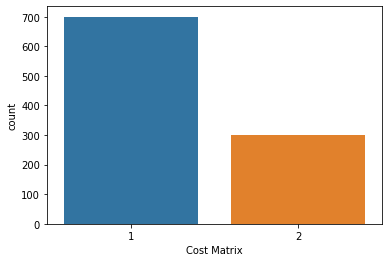

In [144]:
# Montrez le nombre d'observations dans chaque groupe catégoriel en utilisant des barres.
sns.countplot(Final_Data_German["Cost Matrix"])


In [145]:
#Supprimer la variable Target, Donc prendre juste les valeurs de nos variables
x = Final_Data_German.drop("Cost Matrix",axis = 1)
x.head()

,all credits at this bank paid back duly,existing credits paid back duly till now,delay in paying off in the past,critical account/other credits existing (not at this bank),... < 200 DM,... >= 200 DM /salary,no checking account,"yes, registered under the customers name",yes,Bank,...,100 <= and < 500 DM,500 <= and < 1000 DM,>= 1000 DM,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,6,1169,4,4,67,2,1
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,48,5951,2,2,22,1,1
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,12,2096,2,3,49,1,2
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,42,7882,2,4,45,1,2
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,24,4870,3,4,53,2,2


In [146]:
x.describe()

,all credits at this bank paid back duly,existing credits paid back duly till now,delay in paying off in the past,critical account/other credits existing (not at this bank),... < 200 DM,... >= 200 DM /salary,no checking account,"yes, registered under the customers name",yes,Bank,...,100 <= and < 500 DM,500 <= and < 1000 DM,>= 1000 DM,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.049000,0.530000,0.088000,0.293000,0.269000,0.063000,0.394000,0.404000,0.963000,0.13900,...,0.103000,0.063000,0.048000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.215976,0.499349,0.283437,0.455366,0.443662,0.243085,0.488879,0.490943,0.188856,0.34612,...,0.304111,0.243085,0.213873,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [147]:
#Dimesnion de X
x.shape

(1000, 50)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

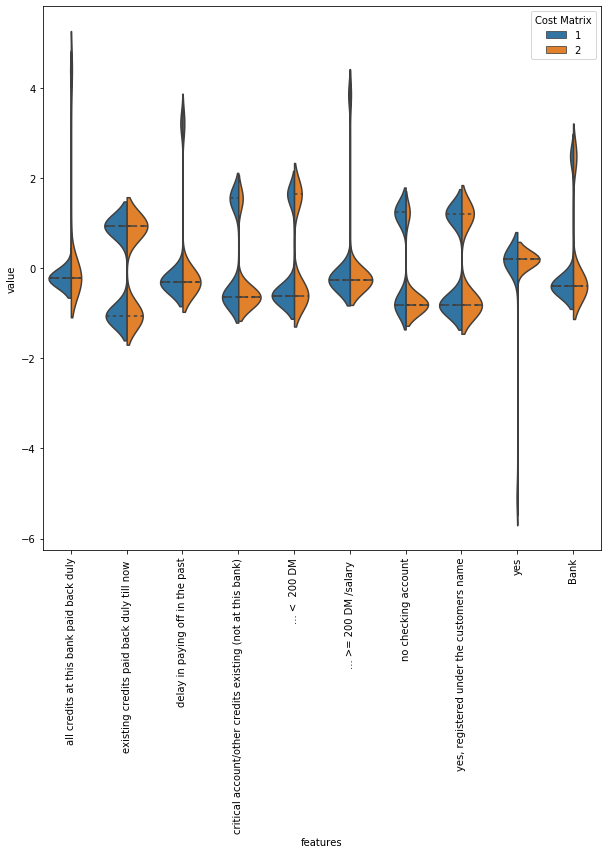

In [148]:
#Afin de visualiser les données, nous allons utiliser des seaborn plots qui ne sont pas utilisées dans d'autres noyaux
#utilisation des violin plot and swarm plot

# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std()) # standardization and normalisation sont exigés avant violin et swarm plot
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)

#pandas.melt: Annuler le pivotement d'un DataFrame du format large au format long
data = pd.melt(data,id_vars="Cost Matrix",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Cost Matrix", data=data,split=True, inner="quart")

# xticks: Obtenez ou définissez les emplacements et les étiquettes des graduations actuelles de l'axe des x.
plt.xticks(rotation=90) # Get locations and labels

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

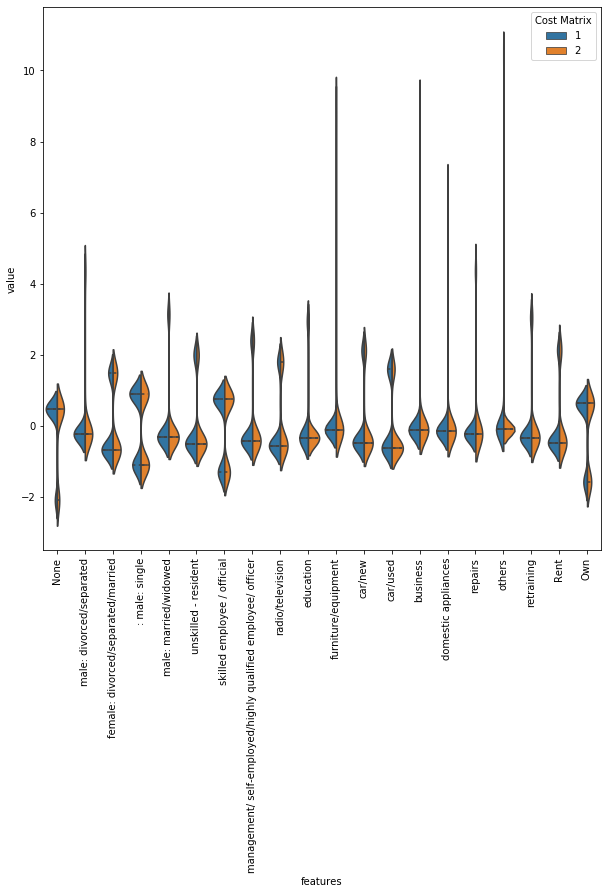

In [149]:
# Second ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,10:30]],axis=1)
data = pd.melt(data,id_vars="Cost Matrix",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Cost Matrix", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

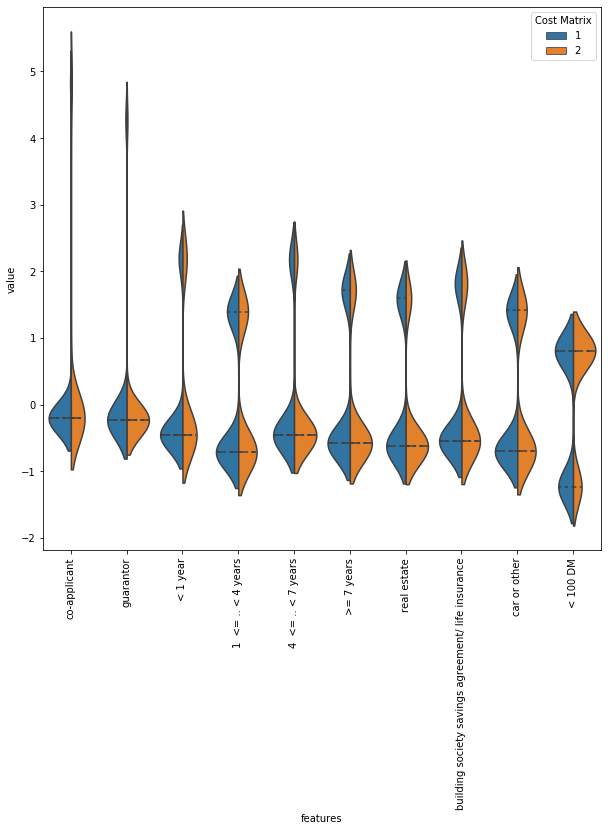

In [150]:
# Third ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,30:40]],axis=1)
data = pd.melt(data,id_vars="Cost Matrix",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Cost Matrix", data=data,split=True, inner="quart")
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

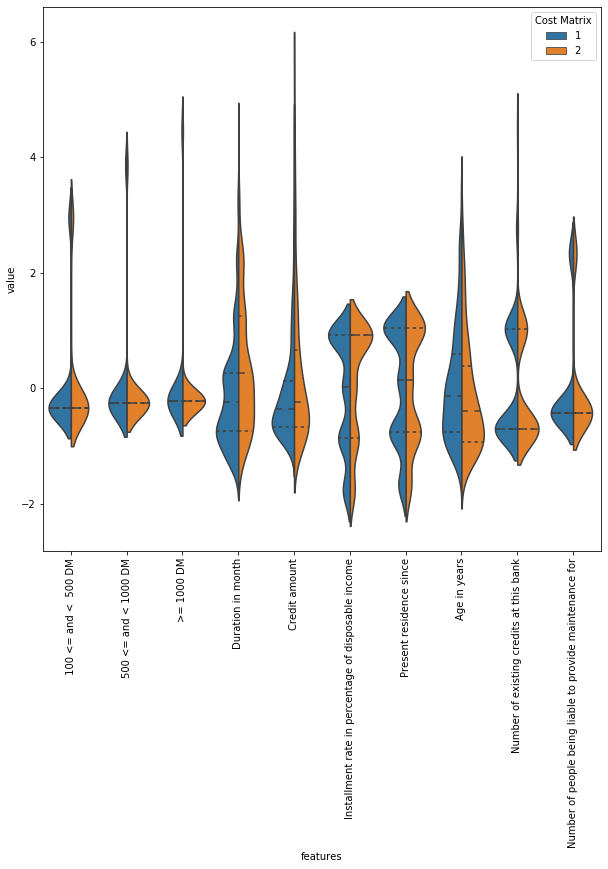

In [152]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,40:50]],axis=1)
data = pd.melt(data,id_vars="Cost Matrix",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Cost Matrix", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

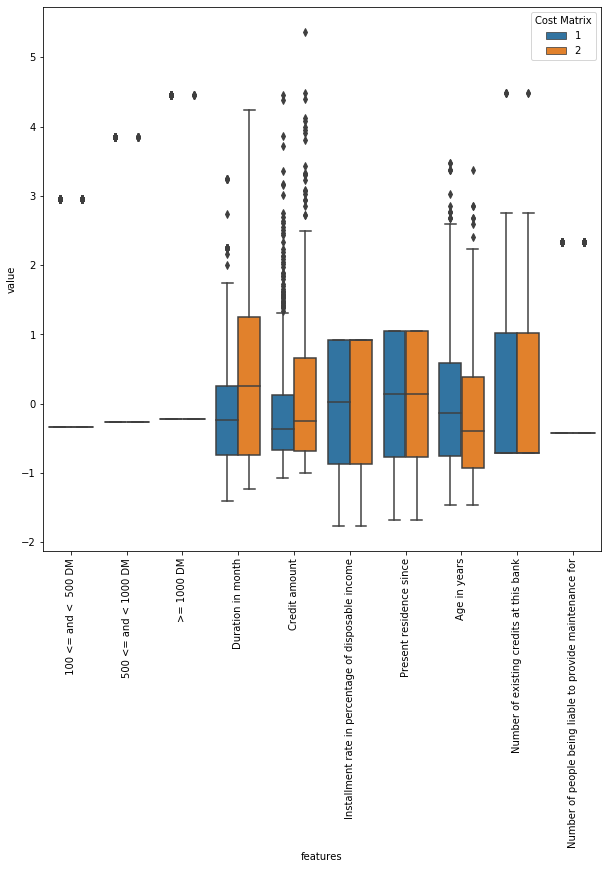

In [153]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(15,15))
sns.boxplot(x="features", y="value", hue="Cost Matrix", data=data)
plt.xticks(rotation=90)
#Existance des points abbérants

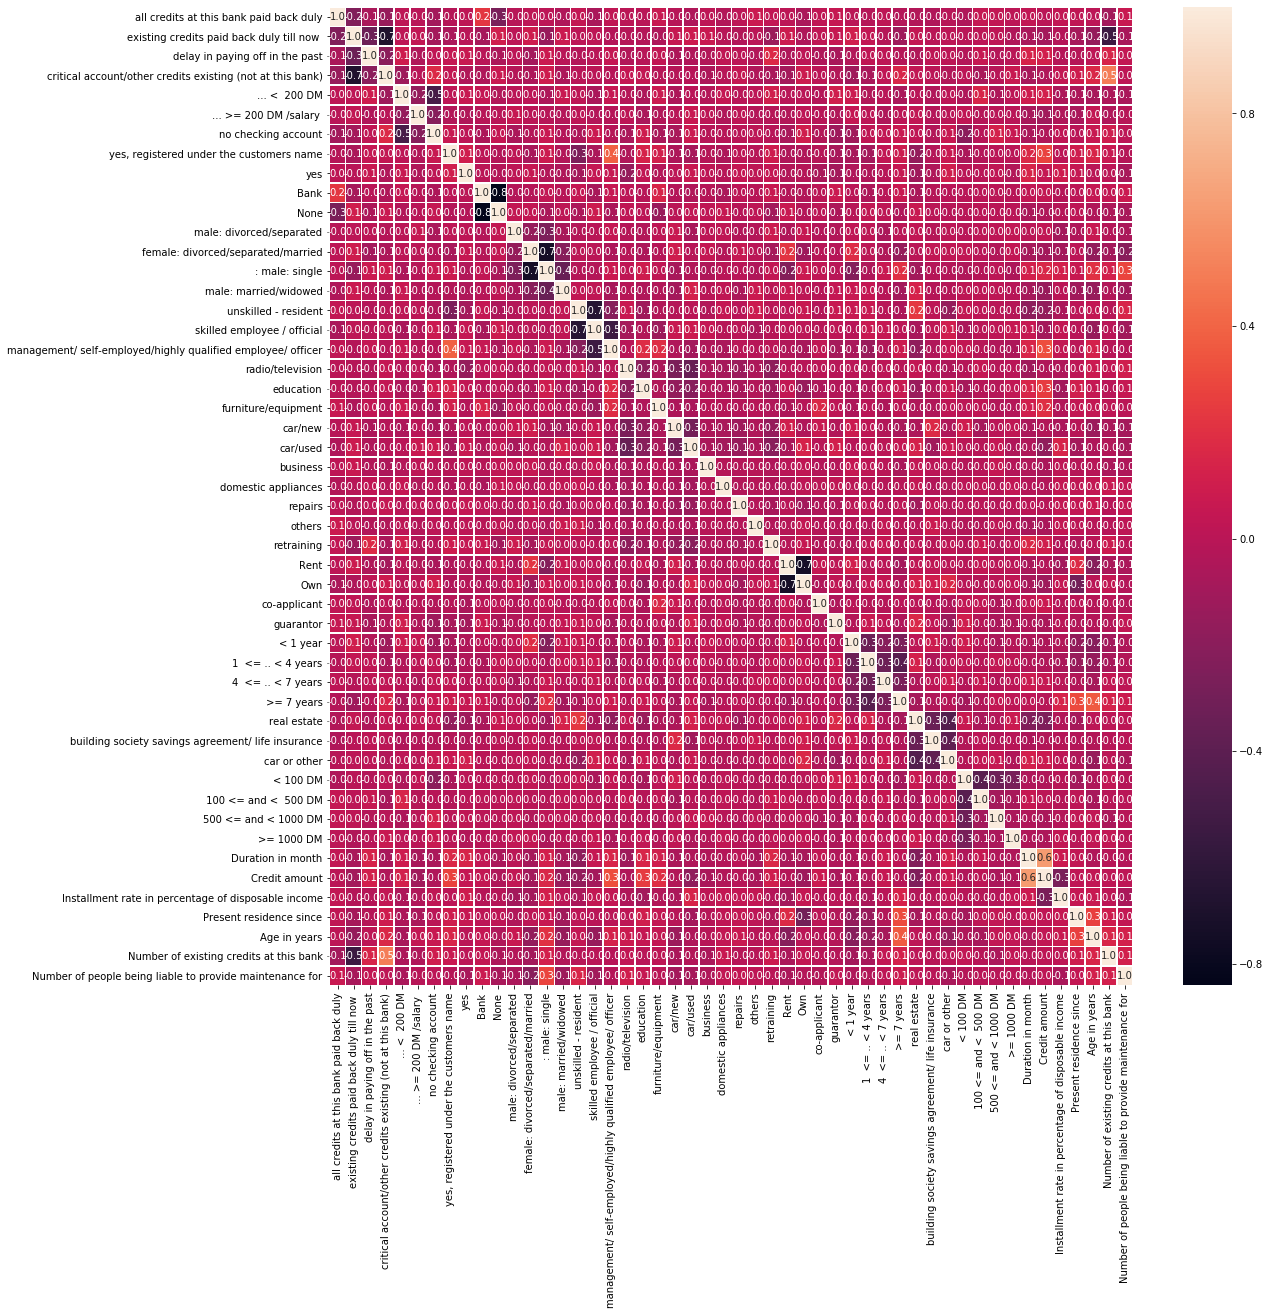

In [154]:
#Visualisation de la corrélation avec heatmap
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

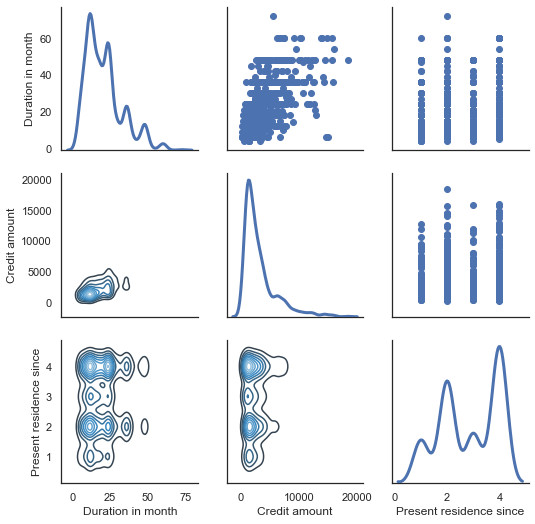

In [155]:
# Autre Fetaures Comparaison, on utlise pair grid plot avec le module seaborn
sns.set(style="white")
df = x.loc[:,['Duration in month','Credit amount','Present residence since']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
# Abscence de ocrréaltion


### Univariate feature selection and random forest classification

### * Dans Univariate Features, on doit travailler avec SelectKBest

In [156]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [ ]:
#détecter les scores les plus élévés des features

In [157]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [1.09960247e+01 2.05988819e+00 1.45455895e-01 2.17454904e+01
 7.15518089e+00 1.85744798e+00 3.85308985e+01 5.17908338e-01
 1.81760481e-01 3.72190335e+00 9.46949395e-01 2.96282096e-01
 4.04708803e+00 2.41354826e+00 9.16886736e-02 4.57515423e-01
 3.01969204e-02 9.03318184e-01 7.73085673e+00 5.06043288e+00
 1.93736053e+00 1.52469141e-01 8.81547537e+00 4.91234567e-01
 1.61018227e-03 5.81208158e+00 8.10444460e-01 2.29785382e+00
 4.37633494e+00 4.55483485e+00 6.64236967e-01 1.03382415e+00
 4.39860237e+00 4.20744228e-02 2.60135929e-01 4.09451466e+00
 9.52021526e+00 7.84493618e-02 9.29517476e-02 5.13270937e+00
 5.27799604e-01 5.02497650e+00 5.67570333e+00 1.81578807e+02
 4.72864413e+04 6.52024994e-01 9.68270040e-04 4.74738618e+01
 4.59472610e-01 6.81841075e-04]
Feature list: Index(['all credits at this bank paid back duly',
       'existing credits paid back duly till now ',
       'delay in paying off in the past',
       'critical account/other credits existing (not at this bank)

In [ ]:
# ceux qui ont les plus hauts scores sont :
# '... <  200 DM'
# 'car or other'

Accuracy is:  0.6766666666666666


C:\Users\BHS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\BHS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


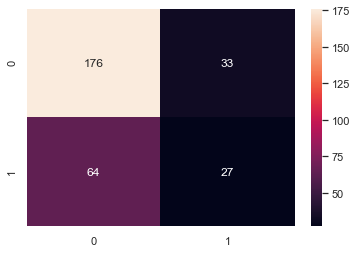

In [158]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [ ]:
# Score du univariate: 0.69

### Recursive feature elimination (RFE) with random forest

In [159]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

C:\Users\BHS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BHS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\BHS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\BHS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\BHS\Anaconda3\lib\site-packages\sklearn\e

In [160]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])


Chosen best 5 feature by rfe: Index(['no checking account', 'Duration in month', 'Credit amount',
       'Present residence since', 'Age in years'],
      dtype='object')


### Recursive feature elimination with cross validation and random forest classification

In [161]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

C:\Users\BHS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BHS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\BHS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\BHS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\BHS\Anaconda3\lib\site-packages\sklearn\e

Optimal number of features : 26
Best features : Index(['existing credits paid back duly till now ',
       'critical account/other credits existing (not at this bank)',
       '... <  200 DM', 'no checking account',
       'yes, registered under the customers name', 'Bank', 'None',
       'female: divorced/separated/married', ': male: single',
       'skilled employee / official', 'radio/television', 'car/used', 'Own',
       '< 1 year', '1  <= .. < 4 years', ' >= 7 years', 'real estate',
       'building society savings agreement/ life insurance', 'car or other',
       '< 100 DM', 'Duration in month', 'Credit amount',
       'Installment rate in percentage of disposable income',
       'Present residence since', 'Age in years',
       'Number of existing credits at this bank'],
      dtype='object')


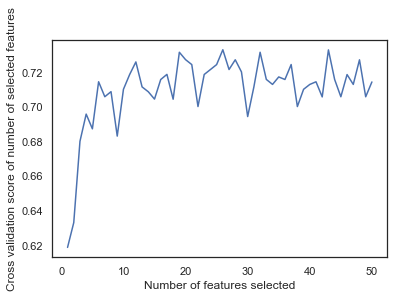

In [162]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Tree based feature selection and random forest classification

C:\Users\BHS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\BHS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\BHS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\BHS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Feature ranking:
1. feature 44 (0.111848)
2. feature 43 (0.090102)
3. feature 47 (0.087105)
4. feature 6 (0.065929)
5. feature 46 (0.046898)
6. feature 45 (0.044974)
7. feature 18 (0.027329)
8. feature 3 (0.024244)
9. feature 39 (0.022583)
10. feature 12 (0.021506)
11. feature 4 (0.020205)
12. feature 33 (0.019592)
13. feature 36 (0.018900)
14. feature 38 (0.018478)
15. feature 32 (0.018477)
16. feature 48 (0.017238)
17. feature 1 (0.017207)
18. feature 7 (0.017206)
19. feature 13 (0.016814)
20. feature 9 (0.016729)
21. feature 22 (0.015508)
22. feature 10 (0.014442)
23. feature 2 (0.014126)
24. feature 17 (0.012877)
25. feature 29 (0.012810)
26. feature 21 (0.012576)
27. feature 0 (0.012375)
28. feature 28 (0.012173)
29. feature 16 (0.011622)
30. feature 41 (0.010912)
31. feature 40 (0.010847)
32. feature 19 (0.010803)
33. feature 35 (0.010315)
34. feature 25 (0.010223)
35. feature 27 (0.010129)
36. feature 34 (0.009774)
37. feature 14 (0.009636)
38. feature 5 (0.009562)
39. feature 3

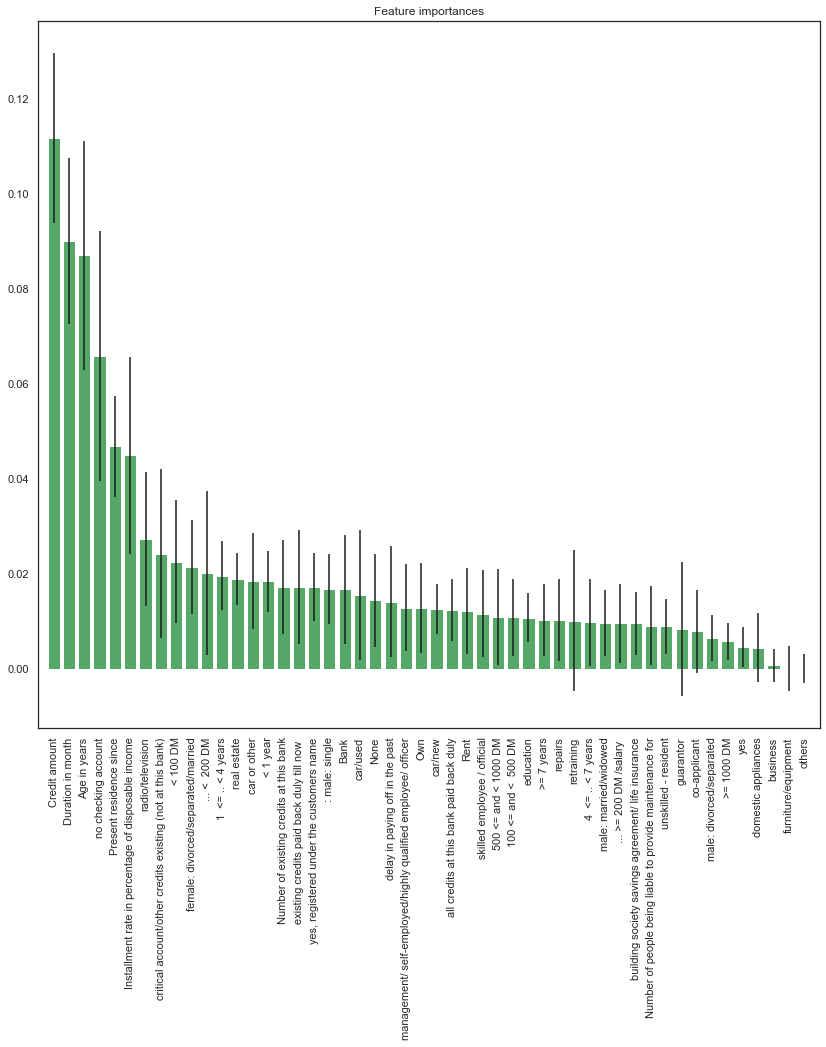

In [163]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [ ]:
#Comme vous pouvez le voir dans le graphique ci-dessus, après 5 meilleures fonctionnalités, 
#l'importance des fonctionnalités diminue. Par conséquent, nous pouvons concentrer ces 5 fonctionnalités.

#### Nous avons essayé de montrer l'importance de la sélection des fonctionnalités et de la visualisation des données. Les données par défaut incluent 51 fonctionnalités, mais après la sélection des fonctionnalités, nous baissons ce nombre de 51 à 5 avec une précision de 69%.

## Feature Extraction

Text(0, 0.5, 'explained_variance_ratio_')

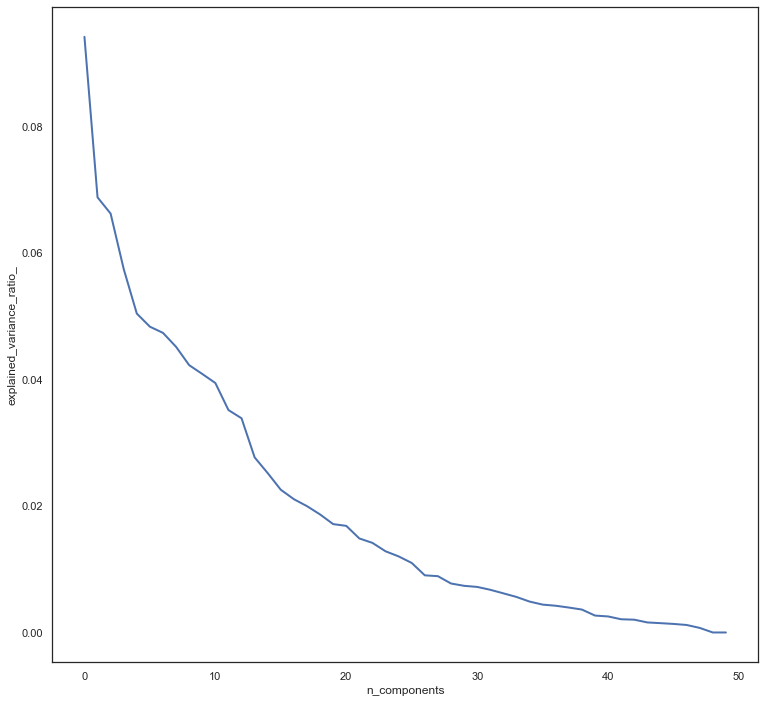

In [164]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [165]:
Data_PCA=pd.DataFrame(Final_Data_German,
             index=Final_Data_German.index,
             columns=['Credit amount','Age in years','Duration in month','no checking account','Installment rate in percentage of disposable income'])

In [166]:
Data_PCA

,Credit amount,Age in years,Duration in month,no checking account,Installment rate in percentage of disposable income
0,1169,67,6,0.0,4
1,5951,22,48,0.0,2
2,2096,49,12,1.0,2
3,7882,45,42,0.0,2
4,4870,53,24,0.0,3
5,9055,35,36,1.0,2
6,2835,53,24,1.0,3
7,6948,35,36,0.0,2
8,3059,61,12,1.0,2
9,5234,28,30,0.0,4


In [167]:
#dimension
print(Final_Data_German.shape) # (18, 6)
#nombre d'observations
n = Final_Data_German.shape[0]
#nombre de variables
p = Final_Data_German.shape[1]
#affichage des données
print(Final_Data_German)


(1000, 51)
     all credits at this bank paid back duly  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
5                                        0.0   
6                                        0.0   
7                                        0.0   
8                                        0.0   
9                                        0.0   
10                                       0.0   
11                                       0.0   
12                                       0.0   
13                                       0.0   
14                                       0.0   
15                                       0.0   
16                                       0.0   
17                                       0.0   
18                                       0.0   
19                           

# ACP

In [168]:
#scikit-learn
import sklearn
#vérification de la version
print(sklearn.__version__) # 0.19.1

0.21.2


In [169]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(Final_Data_German)
print(Z)

[[-0.22699055 -1.06191317 -0.31063037 ...  1.02707891 -0.42828957
  -0.65465367]
 [-0.22699055  0.94169658 -0.31063037 ... -0.704926   -0.42828957
   1.52752523]
 [-0.22699055 -1.06191317 -0.31063037 ... -0.704926    2.33486893
  -0.65465367]
 ...
 [-0.22699055  0.94169658 -0.31063037 ... -0.704926   -0.42828957
  -0.65465367]
 [-0.22699055  0.94169658 -0.31063037 ... -0.704926   -0.42828957
   1.52752523]
 [-0.22699055 -1.06191317 -0.31063037 ... -0.704926   -0.42828957
  -0.65465367]]


In [170]:
#vérification - librairie numpy
import numpy
#moyenne
print(numpy.mean(Z,axis=0))


[ 0.00000000e+00  1.33226763e-17  5.68434189e-17  6.30606678e-17
 -3.55271368e-18  6.75015599e-17 -8.17124146e-17 -7.99360578e-17
  2.16715534e-16 -8.88178420e-18  1.40332190e-16 -1.14575016e-16
 -6.57252031e-17 -8.26005930e-17 -9.76996262e-18 -7.10542736e-18
 -5.50670620e-17  7.10542736e-18  7.46069873e-17  3.01980663e-17
 -1.42108547e-17 -4.97379915e-17 -4.26325641e-17 -1.59872116e-17
 -3.01980663e-17 -1.12798659e-16 -2.84217094e-17 -5.32907052e-18
 -6.39488462e-17  5.32907052e-17 -9.23705556e-17 -3.19744231e-17
  5.68434189e-17  4.26325641e-17  7.28306304e-17  4.26325641e-17
  4.79616347e-17 -1.42108547e-17 -3.55271368e-17 -1.77635684e-18
  4.61852778e-17  5.86197757e-17  1.77635684e-17  1.13686838e-16
  6.66133815e-17  1.01252340e-16 -1.77635684e-16  5.32907052e-17
 -9.41469125e-17 -1.06581410e-17 -1.20792265e-16]


In [171]:
#écart-type
print(numpy.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]


In [172]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [173]:
#affichage des paramètres
print(acp)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [174]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 6


51


In [175]:
#variance expliquée
print(acp.explained_variance_)

[3.35000671e+00 2.82551214e+00 2.36470780e+00 2.14890540e+00
 1.89278945e+00 1.85763729e+00 1.71171961e+00 1.65401782e+00
 1.61255992e+00 1.54710239e+00 1.45129008e+00 1.38701695e+00
 1.35726763e+00 1.25962850e+00 1.20999391e+00 1.19622707e+00
 1.17225938e+00 1.15873588e+00 1.13089109e+00 1.09532551e+00
 1.07636707e+00 1.03379704e+00 1.01706597e+00 9.93772534e-01
 9.86727553e-01 9.61342392e-01 9.36324654e-01 8.84273278e-01
 8.71250607e-01 8.46937461e-01 8.01477688e-01 7.77502440e-01
 7.45333000e-01 7.18037160e-01 7.09642929e-01 6.87011317e-01
 5.86734461e-01 5.60508129e-01 5.26519048e-01 4.44445537e-01
 3.24794485e-01 2.97242789e-01 2.78089171e-01 2.39336005e-01
 1.49714770e-01 7.90877132e-02 5.77117356e-02 4.95498465e-02
 2.68597243e-02 6.60672331e-31 3.87539844e-32]


In [176]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)


[3.34665670e+00 2.82268663e+00 2.36234309e+00 2.14675650e+00
 1.89089666e+00 1.85577965e+00 1.71000789e+00 1.65236381e+00
 1.61094736e+00 1.54555529e+00 1.44983879e+00 1.38562993e+00
 1.35591036e+00 1.25836887e+00 1.20878391e+00 1.19503084e+00
 1.17108713e+00 1.15757714e+00 1.12976020e+00 1.09423018e+00
 1.07529071e+00 1.03276325e+00 1.01604891e+00 9.92778761e-01
 9.85740826e-01 9.60381049e-01 9.35388329e-01 8.83389004e-01
 8.70379357e-01 8.46090524e-01 8.00676210e-01 7.76724938e-01
 7.44587667e-01 7.17319122e-01 7.08933286e-01 6.86324306e-01
 5.86147727e-01 5.59947621e-01 5.25992529e-01 4.44001092e-01
 3.24469690e-01 2.96945546e-01 2.77811082e-01 2.39096669e-01
 1.49565055e-01 7.90086255e-02 5.76540239e-02 4.95002967e-02
 2.68328646e-02 6.60011658e-31 3.87152304e-32]


In [177]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)


[3.34665670e+00 2.82268663e+00 2.36234309e+00 2.14675650e+00
 1.89089666e+00 1.85577965e+00 1.71000789e+00 1.65236381e+00
 1.61094736e+00 1.54555529e+00 1.44983879e+00 1.38562993e+00
 1.35591036e+00 1.25836887e+00 1.20878391e+00 1.19503084e+00
 1.17108713e+00 1.15757714e+00 1.12976020e+00 1.09423018e+00
 1.07529071e+00 1.03276325e+00 1.01604891e+00 9.92778761e-01
 9.85740826e-01 9.60381049e-01 9.35388329e-01 8.83389004e-01
 8.70379357e-01 8.46090524e-01 8.00676210e-01 7.76724938e-01
 7.44587667e-01 7.17319122e-01 7.08933286e-01 6.86324306e-01
 5.86147727e-01 5.59947621e-01 5.25992529e-01 4.44001092e-01
 3.24469690e-01 2.96945546e-01 2.77811082e-01 2.39096669e-01
 1.49565055e-01 7.90086255e-02 5.76540239e-02 4.95002967e-02
 2.68328646e-02 6.60011658e-31 3.87152304e-32]


In [178]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)


[6.56207196e-02 5.53467967e-02 4.63204527e-02 4.20932646e-02
 3.70764052e-02 3.63878363e-02 3.35295665e-02 3.23992903e-02
 3.15872031e-02 3.03050057e-02 2.84282116e-02 2.71692143e-02
 2.65864777e-02 2.46738994e-02 2.37016453e-02 2.34319773e-02
 2.29624926e-02 2.26975910e-02 2.21521609e-02 2.14554938e-02
 2.10841315e-02 2.02502597e-02 1.99225276e-02 1.94662502e-02
 1.93282515e-02 1.88310010e-02 1.83409476e-02 1.73213530e-02
 1.70662619e-02 1.65900103e-02 1.56995335e-02 1.52299007e-02
 1.45997582e-02 1.40650808e-02 1.39006527e-02 1.34573393e-02
 1.14930927e-02 1.09793651e-02 1.03135790e-02 8.70590376e-03
 6.36215079e-03 5.82246168e-03 5.44727611e-03 4.68816998e-03
 2.93264813e-03 1.54918874e-03 1.13047106e-03 9.70594053e-04
 5.26134599e-04 1.29414051e-32 7.59122165e-34]


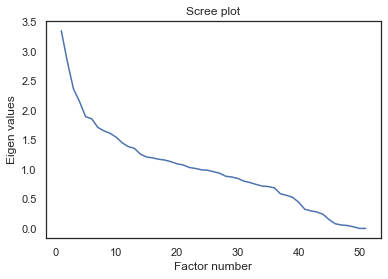

In [179]:
#scree plot
plt.plot(numpy.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


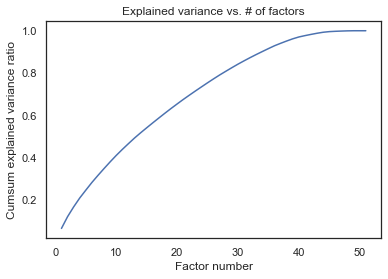

In [180]:
#cumul de variance expliquée
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [181]:
#seuils pour test des bâtons brisés
bs = 1/numpy.arange(p,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]


In [182]:
#test des bâtons brisés
import pandas
print(pandas.DataFrame({'Val.Propre':eigval,'Seuils':bs}))


      Val.Propre    Seuils
0   3.346657e+00  4.518813
1   2.822687e+00  3.518813
2   2.362343e+00  3.018813
3   2.146756e+00  2.685480
4   1.890897e+00  2.435480
5   1.855780e+00  2.235480
6   1.710008e+00  2.068813
7   1.652364e+00  1.925956
8   1.610947e+00  1.800956
9   1.545555e+00  1.689845
10  1.449839e+00  1.589845
11  1.385630e+00  1.498936
12  1.355910e+00  1.415603
13  1.258369e+00  1.338679
14  1.208784e+00  1.267251
15  1.195031e+00  1.200584
16  1.171087e+00  1.138084
17  1.157577e+00  1.079261
18  1.129760e+00  1.023705
19  1.094230e+00  0.971074
20  1.075291e+00  0.921074
21  1.032763e+00  0.873454
22  1.016049e+00  0.828000
23  9.927788e-01  0.784522
24  9.857408e-01  0.742855
25  9.603810e-01  0.702855
26  9.353883e-01  0.664393
27  8.833890e-01  0.627356
28  8.703794e-01  0.591642
29  8.460905e-01  0.557159
30  8.006762e-01  0.523826
31  7.767249e-01  0.491568
32  7.445877e-01  0.460318
33  7.173191e-01  0.430015
34  7.089333e-01  0.400603
35  6.863243e-01  0.372032
3

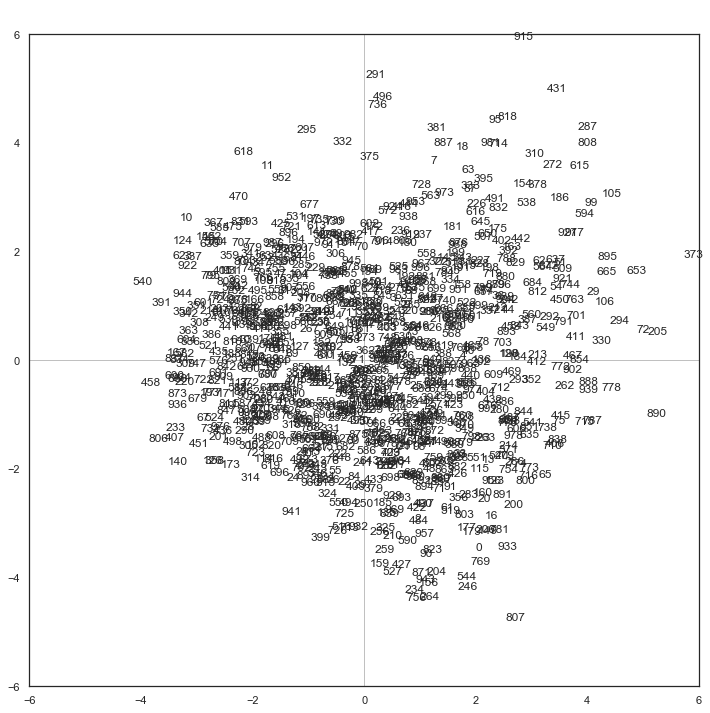

In [183]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(Final_Data_German.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()


In [184]:
#contribution des individus dans l'inertie totale
di = numpy.sum(Z**2,axis=1)
print(pandas.DataFrame({'ID':Final_Data_German.index,'d_i':di}))


      ID        d_i
0      0  35.587949
1      1  33.416869
2      2  54.300156
3      3  58.159626
4      4  41.071966
5      5  55.278475
6      6  42.529239
7      7  44.960877
8      8  74.526419
9      9  43.819130
10    10  39.158066
11    11  47.158716
12    12  31.191883
13    13  36.341409
14    14  30.012503
15    15  38.119754
16    16  29.308808
17    17  51.328896
18    18  52.642572
19    19  42.253336
20    20  33.743502
21    21  48.571110
22    22  72.887969
23    23  45.223172
24    24  65.711008
25    25  41.926290
26    26  39.545170
27    27  84.415161
28    28  40.832494
29    29  57.135661
..   ...        ...
970  970  93.985518
971  971  37.780319
972  972  75.761152
973  973  70.523836
974  974  25.803605
975  975  59.297956
976  976  50.333650
977  977  43.505817
978  978  46.683134
979  979  72.781689
980  980  37.448376
981  981  56.144729
982  982  68.893005
983  983  39.423529
984  984  34.747099
985  985  35.054773
986  986  72.074046
987  987  38.330081


In [185]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pandas.DataFrame({'id':Final_Data_German.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

      id    COS2_1    COS2_2
0      0  0.112105  0.345026
1      1  0.157901  0.090978
2      2  0.015333  0.163014
3      3  0.003512  0.020621
4      4  0.071921  0.000018
5      5  0.036285  0.010118
6      6  0.012924  0.035050
7      7  0.031032  0.291296
8      8  0.009716  0.067929
9      9  0.011115  0.021267
10    10  0.279062  0.169098
11    11  0.072925  0.264858
12    12  0.192649  0.027122
13    13  0.122822  0.097850
14    14  0.196795  0.054706
15    15  0.123041  0.008150
16    16  0.158979  0.289042
17    17  0.075541  0.030329
18    18  0.051100  0.286068
19    19  0.030876  0.028550
20    20  0.123091  0.199474
21    21  0.034336  0.026147
22    22  0.003029  0.072079
23    23  0.010567  0.002429
24    24  0.029558  0.074573
25    25  0.021793  0.003210
26    26  0.011468  0.128569
27    27  0.047770  0.010918
28    28  0.117222  0.039944
29    29  0.279265  0.025295
..   ...       ...       ...
970  970  0.043772  0.009482
971  971  0.004039  0.014161
972  972  0.01

In [186]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(numpy.sum(cos2,axis=1))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [187]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pandas.DataFrame({'id':Final_Data_German.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))


      id     CTR_1         CTR_2
0      0  0.001192  4.350034e-03
1      1  0.001577  1.077059e-03
2      2  0.000249  3.135911e-03
3      3  0.000061  4.248840e-04
4      4  0.000883  2.559363e-07
5      5  0.000599  1.981517e-04
6      6  0.000164  5.281021e-04
7      7  0.000417  4.639877e-03
8      8  0.000216  1.793497e-03
9      9  0.000146  3.301423e-04
10    10  0.003265  2.345834e-03
11    11  0.001028  4.424995e-03
12    12  0.001796  2.997116e-04
13    13  0.001334  1.259789e-03
14    14  0.001765  5.816715e-04
15    15  0.001401  1.100599e-04
16    16  0.001392  3.001207e-03
17    17  0.001159  5.515111e-04
18    18  0.000804  5.335122e-03
19    19  0.000390  4.273679e-04
20    20  0.001241  2.384590e-03
21    21  0.000498  4.499249e-04
22    22  0.000066  1.861242e-03
23    23  0.000143  3.892231e-05
24    24  0.000580  1.736034e-03
25    25  0.000273  4.768659e-05
26    26  0.000136  1.801217e-03
27    27  0.001205  3.265199e-04
28    28  0.001430  5.778167e-04
29    29  

In [188]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 4.29436610e-02 -2.77213844e-01  1.17398200e-01 ...  2.23337137e-01
   1.34120820e-01 -2.77751444e-02]
 [ 1.01482497e-01  1.59782831e-01  5.14546847e-02 ... -1.96208299e-01
  -9.23550837e-02  2.73158409e-01]
 [ 2.15136311e-01 -7.46792285e-02  7.10252439e-03 ...  3.02033962e-02
   1.83256251e-01  1.36803449e-01]
 ...
 [-5.27675495e-03  9.90949355e-03  1.43943613e-02 ... -1.73920191e-02
  -7.16291800e-04  6.41141520e-03]
 [ 4.45898785e-17  2.53851213e-16 -2.40335163e-16 ...  2.21790077e-17
  -1.83370488e-16  1.82656003e-16]
 [ 0.00000000e+00 -1.21735146e-16 -1.17219242e-16 ...  6.81332357e-17
   1.48107421e-17  4.39257608e-17]]


In [189]:
#racine carrée des valeurs propres
sqrt_eigval = numpy.sqrt(eigval)

In [190]:
#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)


[[ 7.85605740e-02  1.70499252e-01  3.30662697e-01 ... -8.64371513e-04
   3.62253085e-32  0.00000000e+00]
 [-5.07131396e-01  2.68448785e-01 -1.14781345e-01 ...  1.62324838e-03
   2.06231522e-31 -2.39528341e-32]
 [ 2.14766737e-01  8.64482596e-02  1.09165201e-02 ...  2.35790291e-03
  -1.95250934e-31 -2.30642764e-32]
 ...
 [ 4.08570049e-01 -3.29646680e-01  4.64223654e-02 ... -2.84894145e-03
   1.80184702e-32  1.34060223e-32]
 [ 2.45358880e-01 -1.55164419e-01  2.81663313e-01 ... -1.17333898e-04
  -1.48972204e-31  2.91418920e-33]
 [-5.08114874e-02  4.58929429e-01  2.10265748e-01 ...  1.05023726e-03
   1.48391749e-31  8.64291450e-33]]


In [191]:
#on affiche pour les deux premiers axes
print(pandas.DataFrame({'id':Final_Data_German.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

                                                   id     COR_1     COR_2
0             all credits at this bank paid back duly  0.078561  0.170499
1           existing credits paid back duly till now  -0.507131  0.268449
2                     delay in paying off in the past  0.214767  0.086448
3   critical account/other credits existing (not a...  0.355370 -0.486649
4                                       ... <  200 DM -0.055665  0.331966
5                              ... >= 200 DM /salary  -0.094856 -0.073605
6                                 no checking account  0.169551 -0.379157
7            yes, registered under the customers name  0.420439  0.234205
8                                                 yes  0.111133  0.172247
9                                                Bank  0.203461  0.197605
10                                               None -0.224619 -0.199170
11                           male: divorced/separated -0.031667  0.067602
12                 female: divorced/se

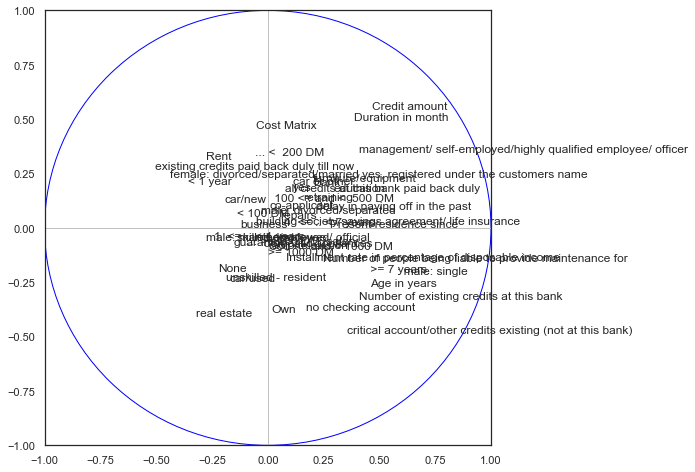

In [192]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(Final_Data_German.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()


In [193]:
#cosinus carré des variables
cos2var = corvar**2
print(pandas.DataFrame({'id':Final_Data_German.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))


                                                   id    COS2_1    COS2_2
0             all credits at this bank paid back duly  0.006172  0.029070
1           existing credits paid back duly till now   0.257182  0.072065
2                     delay in paying off in the past  0.046125  0.007473
3   critical account/other credits existing (not a...  0.126288  0.236827
4                                       ... <  200 DM  0.003099  0.110201
5                              ... >= 200 DM /salary   0.008998  0.005418
6                                 no checking account  0.028748  0.143760
7            yes, registered under the customers name  0.176769  0.054852
8                                                 yes  0.012350  0.029669
9                                                Bank  0.041396  0.039048
10                                               None  0.050453  0.039669
11                           male: divorced/separated  0.001003  0.004570
12                 female: divorced/se

In [194]:
#Affichage des pourcentages de variances accumulatives
cum_explained_var = []
for i in range(0, len(acp.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(acp.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(acp.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

print(cum_explained_var)

[0.06562071959844634, 0.12096751626052688, 0.16728796900240503, 0.20938123361677674, 0.2464576387938787, 0.28284547508280267, 0.3163750415692295, 0.3487743318921055, 0.38036153502616815, 0.4106665407617621, 0.4390947523427729, 0.46626396664947756, 0.49285044433882347, 0.5175243437504405, 0.541225989070911, 0.5646579663779523, 0.5876204590255143, 0.6103180500529474, 0.6324702109080927, 0.6539257046987594, 0.675009836209378, 0.695260095953236, 0.7151826235285912, 0.7346488737467672, 0.7539771252282071, 0.7728081261965785, 0.7911490738299205, 0.8084704268576576, 0.8255366887511081, 0.8421266990233691, 0.857826232550653, 0.87305613329298, 0.887655891464261, 0.9017209722948645, 0.9156216249705346, 0.929078964296523, 0.9405720569818694, 0.9515514220991418, 0.9618650011019497, 0.970570904862258, 0.9769330556498516, 0.982755517331505, 0.988202793441963, 0.9928909634210107, 0.9958236115554734, 0.9973728002909941, 0.9985032713478827, 0.9994738654005014, 1.0, 1.0, 1.0]


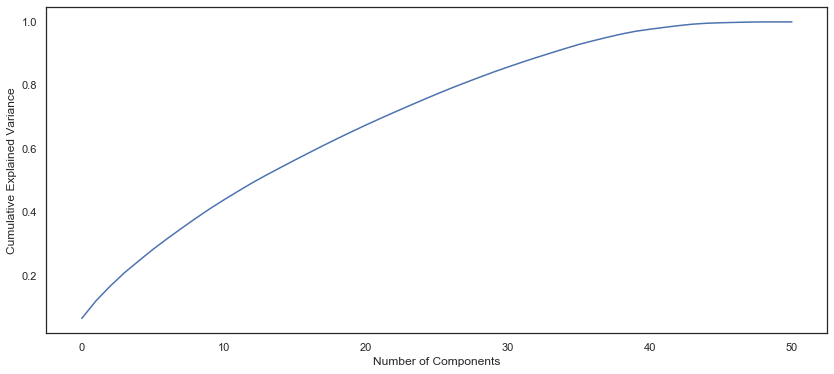

In [195]:
#Courbe de la variance accumulative
plt.figure(figsize=(14,6))
plt.plot(np.cumsum(acp.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

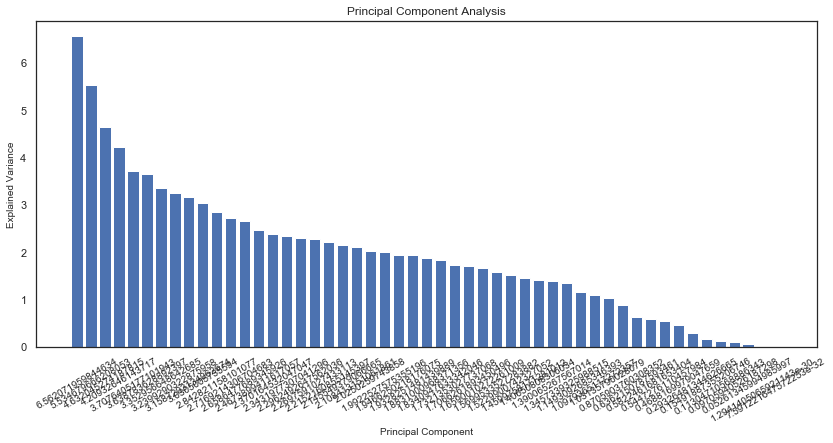

In [196]:
index = np.arange(len(acp.explained_variance_ratio_))
plt.figure(figsize=(14,6))
plt.title('Principal Component Analysis')
plt.bar(index, acp.explained_variance_ratio_*100)
plt.xlabel('Principal Component', fontsize=10)
plt.ylabel('Explained Variance', fontsize=10)
plt.xticks(index, acp.explained_variance_ratio_*100, fontsize=10, rotation=30)
plt.show()

C:\Users\BHS\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


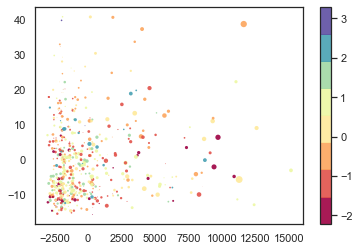

In [197]:
#We are able to explain around 60% variance in the dataset using just four components. 
#Let us now try to visualize each of these decomposed components:
pca_result = acp.fit_transform(Final_Data_German.values)
plt.scatter(pca_result[:, 0],pca_result[:, 1],pca_result[:, 2], pca_result[:, 3],
            edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('Spectral', 8))
plt.colorbar();

## SVD

In [198]:
#Singular Value Decomposition(SVD)

#SVD decomposes the original variables into three constituent matrices. It is essentially used to remove redundant features from the dataset. It uses the concept of Eigenvalues and Eigenvectors to determine those three matrices.

#Let’s implement SVD and decompose our original variables:

In [199]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(Data_PCA.values)
svd.shape

(1000, 3)

In [200]:
#Let us visualize the transformed variables by plotting the first three principal components:
#plt.figure(figsize=(16,10))
#plt.title('SVD Components')
#plt.scatter(svd[:,0], svd[:,1],c='r',s=5)
#plt.scatter(svd[:,1], svd[:,2],c='b',s=5)
#plt.scatter(svd[:,2],svd[:,0],c='g',s=5)
#plt.scatter(svd[:,3],svd[:,3],c='p',s=5)
#plt.scatter(svd[:,4],svd[:,4],c='y',s=5)

#plt.legend(("Principal Component 1","Principal Component 2","Principal Component 3","Principal Component 4","Principal Component 5"))

## KMEANS

In [201]:
DataFinalPCA=pd.DataFrame(Final_Data_German,
             index=Final_Data_German.index,
             columns=['Credit amount','Duration in month','Installment rate in percentage of disposable income'])

In [202]:
DataFinalPCA

,Credit amount,Duration in month,Installment rate in percentage of disposable income
0,1169,6,4
1,5951,48,2
2,2096,12,2
3,7882,42,2
4,4870,24,3
5,9055,36,2
6,2835,24,3
7,6948,36,2
8,3059,12,2
9,5234,30,4


In [203]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
DataFinalPCA.columns

Index(['Credit amount', 'Duration in month',
       'Installment rate in percentage of disposable income'],
      dtype='object')

In [205]:
y= pd.factorize(Final_Data_German["Cost Matrix"])[0]#y prend le variable(colonne) cible

In [206]:
wcss = []

for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Data_PCA)
    wcss.append(kmeans.inertia_)

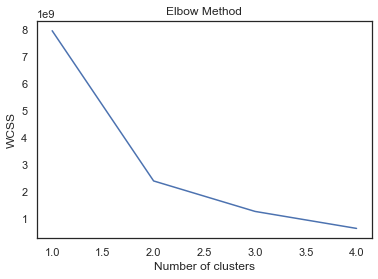

In [207]:
plt.plot(range(1,5), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [208]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(Data_PCA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [209]:
V_Labels=Final_Data_German.iloc[:,-1];

In [210]:
pd.crosstab(V_Labels, kmeans.labels_)

col_0,0,1
Cost Matrix,,
1,101,599
2,72,228


In [211]:

#Data_PCA.boxplot(by = V_Labels, column = ["Credit amount"],figsize=(10,10));

### CAH

In [212]:
#pour CAH
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster,set_link_color_palette
from scipy.spatial.distance import pdist

In [213]:
#realisation du CAH
Z = linkage(Data_PCA.iloc[:,0:4],'ward')
Z

array([[1.61000000e+02, 5.80000000e+02, 1.41421356e+00, 2.00000000e+00],
       [7.85000000e+02, 8.76000000e+02, 1.41421356e+00, 2.00000000e+00],
       [7.10000000e+01, 8.23000000e+02, 2.00000000e+00, 2.00000000e+00],
       ...,
       [1.99000000e+03, 1.99400000e+03, 3.24102536e+04, 7.79000000e+02],
       [1.99300000e+03, 1.99500000e+03, 4.96614411e+04, 2.21000000e+02],
       [1.99600000e+03, 1.99700000e+03, 1.04085887e+05, 1.00000000e+03]])

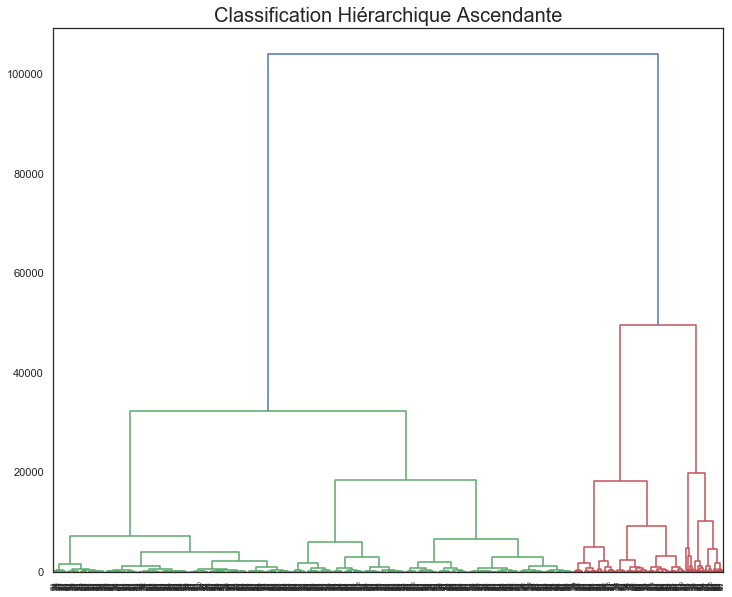

In [214]:
#l'affichage du dendogramme
plt.figure(figsize=(12, 10))
plt.title('Classification Hiérarchique Ascendante', fontsize=20)
d = dendrogram(Z)
plt.show()

In [215]:
#couper le dendogramme
clusters = fcluster(Z,criterion='distance', t=80000)

In [216]:
pd.crosstab(V_Labels,clusters)

col_0,1,2
Cost Matrix,,
1,570,130
2,209,91


### CAH complete

In [217]:
ZComplete = linkage(Data_PCA.iloc[:,0:4],'complete')

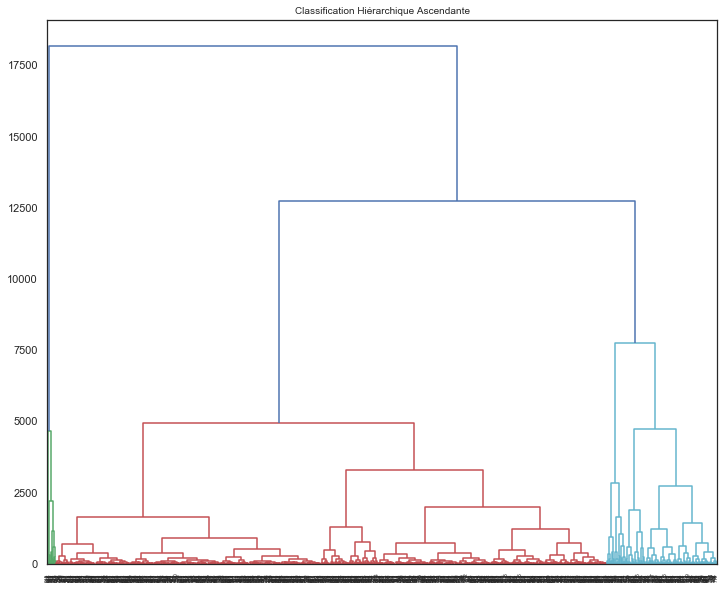

In [218]:
#l'affichage du dendogramme
plt.figure(figsize=(12, 10))
plt.title('Classification Hiérarchique Ascendante', fontsize=10)
dComplete = dendrogram(ZComplete)
plt.show()

In [219]:
#couper le dendogramme
clustersComplete = fcluster(Z,criterion='distance', t=15000)

In [220]:
#Calculez une simple tabulation croisée de deux (ou plus) facteurs
pd.crosstab(V_Labels,clustersComplete)

col_0,1,2,3,4,5,6,7
Cost Matrix,,,,,,,
1,259,122,189,35,70,4,21
2,99,45,65,26,34,9,22


## CAH single 

In [221]:
ZSingle = linkage(Data_PCA.iloc[:,0:4],'single')

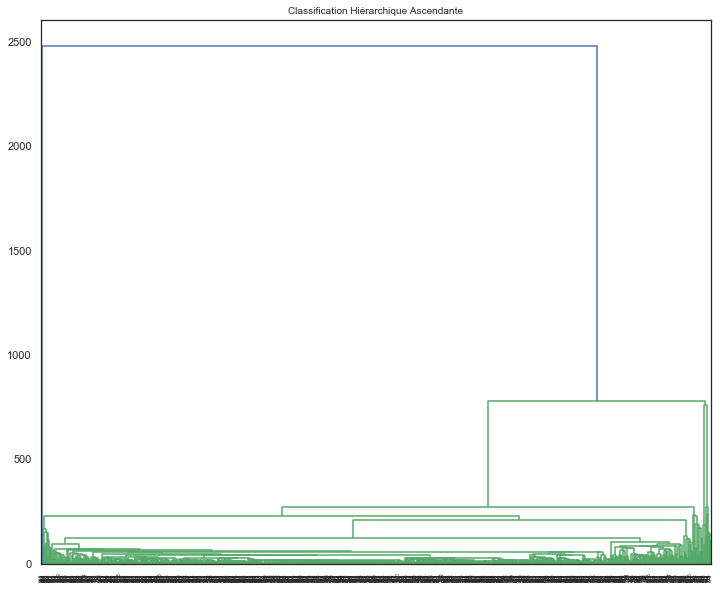

In [222]:
#l'affichage du dendogramme
plt.figure(figsize=(12, 10))
plt.title('Classification Hiérarchique Ascendante', fontsize=10)
dSingle = dendrogram(ZSingle)
plt.show()

In [223]:
#couper le dendogramme
clustersSingle = fcluster(ZSingle,criterion='distance', t=1500)

In [224]:
#Calculez une simple tabulation croisée de deux (ou plus) facteurs
pd.crosstab(V_Labels,clustersSingle)

col_0,1,2
Cost Matrix,,
1,700,0
2,299,1


### DBSCAN

### ****************************************************************************

### DBSCAN Clustering

# Importing the libraries
#import numpy as np
#import pandas as pd

# Importing the dataset

#X =  Data_PCA


# Using the elbow method to find the optimal number of clusters
#from sklearn.cluster import DBSCAN
#dbscan=DBSCAN(eps=5,min_samples=4)

# Fitting the model

#model=dbscan.fit(X)

#labels=model.labels_


#from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)

print("Number of cluster : ",n_clusters)

print(metrics.silhouette_score(X,labels))

### KNN

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
#pour les methodes de scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#pour les methodes d'encodage
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#pour K-means
from sklearn.cluster import KMeans 
from sklearn.metrics.cluster import adjusted_rand_score
#pour CAH
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster,set_link_color_palette
from scipy.spatial.distance import pdist
#pour Apriori
from apyori import apriori

#pour KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix# c'est 2 biblio sont utilisé aussi dans arbre de decision et random forest
#pour l'arbre de decision
from sklearn.tree import DecisionTreeClassifier
#pour random forest
from sklearn.ensemble import RandomForestClassifier
#pour la courbe ROC
from sklearn.metrics import roc_curve, auc

In [226]:
X= Data_PCA.iloc[:,0:5].values
y= pd.factorize(Final_Data_German["Cost Matrix"])[0]#y prend le variable(colonne) cible

In [227]:
X

array([[1.169e+03, 6.700e+01, 6.000e+00, 0.000e+00, 4.000e+00],
       [5.951e+03, 2.200e+01, 4.800e+01, 0.000e+00, 2.000e+00],
       [2.096e+03, 4.900e+01, 1.200e+01, 1.000e+00, 2.000e+00],
       ...,
       [8.040e+02, 3.800e+01, 1.200e+01, 1.000e+00, 4.000e+00],
       [1.845e+03, 2.300e+01, 4.500e+01, 0.000e+00, 4.000e+00],
       [4.576e+03, 2.700e+01, 4.500e+01, 0.000e+00, 3.000e+00]])

In [228]:
y;

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [230]:
y;

Text(0, 0.5, 'Erreur')

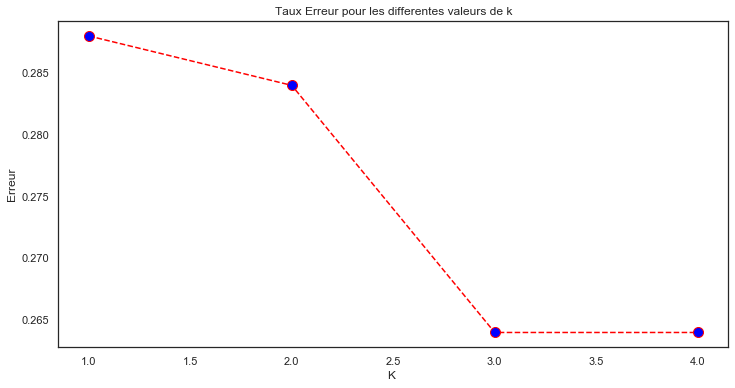

In [231]:
# determine le K optimal on se basant sur la methode d'evaluation d'apprentissage Test set validation (holdout method)
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 5):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 5), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [232]:
X_train

array([[0.2146473 , 0.28571429, 0.29411765, 1.        , 0.33333333],
       [0.18482447, 0.14285714, 0.64705882, 1.        , 0.        ],
       [0.06393749, 0.17857143, 0.11764706, 1.        , 1.        ],
       ...,
       [0.19709475, 0.80357143, 0.07352941, 1.        , 0.        ],
       [0.0923297 , 0.21428571, 0.20588235, 0.        , 0.33333333],
       [0.5286123 , 0.21428571, 0.47058824, 0.        , 0.        ]])

In [233]:
from sklearn import metrics
# K par defaut est 5 et la distance par defaut est euclidienne
knn = KNeighborsClassifier(2)#si on veut utiliser la distance manhattan donc:metric='manhattan'
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
k=metrics.accuracy_score(y_test, y_pred_knn)
print(k)

0.716


In [234]:
#pour afficher la precision des l'algo KNN sur les trainSet et testSet(en pourcentage)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_model.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_model.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.72


In [235]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[160  16]
 [ 55  19]]


In [236]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       176
           1       0.54      0.26      0.35        74

    accuracy                           0.72       250
   macro avg       0.64      0.58      0.58       250
weighted avg       0.68      0.72      0.68       250



In [237]:
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Pickle KNN

In [238]:
from sklearn import metrics


In [239]:
import pickle
with open('german_knn3.pkl','wb') as file:
    pickle.dump([knn_model,k],file)

In [240]:
with open ('german_knn3.pkl','rb') as file:
    data = pickle.load(file)

In [241]:
df = np.array([4356,4,35,78,1]).reshape(1,5)

In [242]:
df

array([[4356,    4,   35,   78,    1]])

## pikle for form knn 

In [243]:
import pickle
with open('german_knn4.pkl','wb') as file:
    pickle.dump(knn_model,file)

In [244]:
with open ('german_knn4.pkl','rb') as file:
    data = pickle.load(file)

In [245]:
df = np.array([4356,4,35,78,1]).reshape(1,5)

In [246]:
data.predict(df)

array([0], dtype=int64)

### Random forest

In [247]:
#appliquer l'algo arbre de decision en se basant sur la resultat obtenue par la methode d'evaluation d'apprentissage Test set validation (holdout method)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)
r=metrics.accuracy_score(y_test, y_pred_rfc)
print(r)

0.744


C:\Users\BHS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [248]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.98
Accuracy of Random Forest classifier on test set: 0.74


In [249]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rfc))

[[155  21]
 [ 43  31]]


In [250]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       176
           1       0.60      0.42      0.49        74

    accuracy                           0.74       250
   macro avg       0.69      0.65      0.66       250
weighted avg       0.73      0.74      0.73       250



In [251]:
import pickle
with open('german_RF2.pkl','wb') as file:
    pickle.dump([rfc_model,r],file)

In [252]:
with open ('german_RF.pkl','rb') as file:
    data = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'german_RF.pkl'

### Arbre de decision (Classification And Regression Trees CART)

In [ ]:
#appliquer l'algo arbre de decision en se basant sur la resultat obtenue par la methode d'evaluation d'apprentissage Test set validation (holdout method)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)
print(y_pred_dtc)
c=metrics.accuracy_score(y_test, y_pred_dtc)
print(c)

In [ ]:
dtc_model

In [ ]:
#pour afficher la precision des l'algo CART sur les trainSet et testSet(en pourcentage)
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc_model.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc_model.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dtc))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))

In [ ]:
#from sklearn.metrics import accuracy_score
#print(accuracy_score(y_test, y_pred_dtc))

In [ ]:
y_test

### Pikle CRT 

In [ ]:
import pickle
with open('german_CRT2.pkl','wb') as file:
    pickle.dump([dtc_model,c],file)

In [ ]:
with open ('german_CRT2.pkl','rb') as file:
    data = pickle.load(file)

### Courbe ROC (receiver operating characteristic)

In [ ]:
from sklearn.metrics import roc_curve, auc
#*****************Algo CART*******************
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_dtc)
roc_auc1 = auc(fpr1, tpr1)
#*****************Algo random forest*******************
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_rfc)
roc_auc2 = auc(fpr2, tpr2)
#*****************Algo KNN*******************
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)

In [ ]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

### XgBoost

In [ ]:
# XGBoost

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

X= Data_PCA.iloc[:,0:4].values
y= pd.factorize(Final_Data_German["Cost Matrix"])[0]#y prend le variable(colonne) cible

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting XGBoost to the Training set
import xgboost
classifier = xgboost.XGBClassifier()
xg_model=classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

### Pickle XG_Boost

In [ ]:
x=xg_model.score(X_test,y_test)
x
print(x)

In [ ]:
import pickle
with open('german_XgBoost2.pkl','wb') as file:
    pickle.dump([xg_model,x],file)

In [ ]:
with open ('german_XgBoost2.pkl','rb') as file:
    data = pickle.load(file)

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
#*****************Algo xgboost*******************
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure() 
plt.plot(fpr, tpr, color='black', lw=2, label='xg_boost curve (area = %0.2f)'% roc_auc)
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

In [ ]:
#SVM 

In [ ]:
from sklearn.svm import SVC
model_svm= SVC()
model_svm.fit(X_train,y_train)
y_pred_svm = model_svm.predict(X_test)

In [ ]:
print(y_pred_svm)

### pikle SVM 

In [ ]:
S=model_svm.score(X_test,y_test)
S
print(S)

In [ ]:
import pickle
with open('german_SVM2.pkl','wb') as file:
    pickle.dump([model_svm,S],file)

In [ ]:
with open ('german_SVM2.pkl','rb') as file:
    data = pickle.load(file)

In [ ]:
#*****************Algo SVM*******************
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svm)
roc_auc4 = auc(fpr4, tpr4)

In [ ]:
plt.figure() 
plt.plot(fpr, tpr, color='black', lw=2, label='xg_boost ROC curve (area = %0.2f)'% roc_auc)
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='pink', lw=2, label='SVM ROC curve (area = %0.2f)'% roc_auc3)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_NB= GaussianNB()
model_NB.fit(X_train,y_train)
y_pred_NB = model_NB.predict(X_test)

In [ ]:
#*****************Algo NAIVE _BAYES*******************
fpr5, tpr5, threshold5 = roc_curve(y_test, y_pred_NB)
roc_auc5 = auc(fpr5, tpr5)

In [ ]:
from sklearn.linear_model import LinearRegression
model_LR= LinearRegression()
model_lr=model_LR.fit(X_train,y_train)
y_pred_LR = model_LR.predict(X_test)

### Pikle Naive Bayes

In [ ]:
n=model_NB.score(X_test,y_test)
n
print(n)

In [ ]:
import pickle
with open('german_NB2.pkl','wb') as file:
    pickle.dump([model_NB,n],file)

In [ ]:
with open ('german_NB2.pkl','rb') as file:
    data = pickle.load(file)

In [ ]:
import pickle
with open('german_LR.pkl','rb') as file:
    data = pickle.load(file)
    result = data.score(X_test, y_test)
    pickle.dump([model_lr,data],file)
    

### Pikle Logistic Regression

In [ ]:
a=model_lr.score(X_test,y_test)
a
print(a)

In [ ]:
import pickle
with open('mariemtest.pkl','wb') as file:
    pickle.dump([model_lr,a] ,file)

In [ ]:
with open ('mariemtest.pkl','rb') as file:
    data = pickle.load(file)
   

In [ ]:
data

In [ ]:
data[1]

In [ ]:
#*****************Algo Linear Regression*******************
fpr6, tpr6, threshold6 = roc_curve(y_test, y_pred_NB)
roc_auc6 = auc(fpr6, tpr6)


In [ ]:
plt.figure() 
plt.plot(fpr, tpr, color='black', lw=2, label='xg_boost ROC curve (area = %0.2f)'% roc_auc)
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='pink', lw=2, label='SVM ROC curve (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='orange', lw=2, label='NB ROC curve (area = %0.2f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='orange', lw=2, label='LR ROC curve (area = %0.2f)'% roc_auc6)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

### pikle ROC

In [ ]:
import pickle
with open('roc.pkl','wb') as file:
    pickle.dump([fpr,tpr,fpr1,tpr1,fpr2,tpr2,fpr3,tpr3,fpr4,tpr4,fpr5,tpr5,fpr6,tpr6,roc_auc,roc_auc1,roc_auc2,roc_auc3,roc_auc4,roc_auc5,roc_auc6] ,file)

In [ ]:
with open ('roc.pkl','rb') as file:
    data = pickle.load(file)
   